# 분류 실습 - 캐글 산탄데르 고객 만족 예측

**타겟 레이블이 1이면 불만, 0이면 만족한 고객**  

**산탄데르 고객 만족 예측 분석은 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여
부를 예측하는 것**

## 간단한 탐색 및 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3     var38  TARGET  
0                     0.0                     0.0  39205.17       0  
1                     0.0                     0.0  49278.03       0  
2                     0.0                     0.0  67333.77       0  

[3 rows x 371 columns]

In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


## 중요! 타겟 데이터의 비율, 분포 확인

In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

## 이상치 처리

In [5]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)

## 여기서는 그냥 분리를 했지만, 더 정확하게 타겟 분포에 맞춰 분리를 원한다면 stratify = y_labels 옵션을 추가
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### XGBoost 모델 학습, 조기 중단 = 100
### 테스트 예측 ROC_AUC = 0.8413

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

### XGBoost 하이퍼파라미터 튜닝
### GridSearchCV : max_depth, min_child_weight, colsample_bytree
### estimator, ES 파라미터 줄임
### 테스트 ROC_AUC : 0.8434

In [8]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80038	validation_1-auc:0.79818
[1]	validation_0-auc:0.81995	validation_1-auc:0.81649
[2]	validation_0-auc:0.82649	validation_1-auc:0.82081
[3]	validation_0-auc:0.83183	validation_1-auc:0.82450
[4]	validation_0-auc:0.83650	validation_1-auc:0.82830
[5]	validation_0-auc:0.83943	validation_1-auc:0.83588
[6]	validation_0-auc:0.83793	validation_1-auc:0.83169
[7]	validation_0-auc:0.84466	validation_1-auc:0.83748
[8]	validation_0-auc:0.84785	validation_1-auc:0.83735
[9]	validation_0-auc:0.84684	validation_1-auc:0.83529
[10]	validation_0-auc:0.84626	validation_1-auc:0.83278
[11]	validation_0-auc:0.84769	validation_1-auc:0.83157
[12]	validation_0-auc:0.85327	validation_1-auc:0.83573
[13]	validation_0-auc:0.85730	validation_1-auc:0.83839
[14]	validation_0-auc:0.85934	validation_1-auc:0.83892
[15]	validation_0-auc:0.86089	validation_1-auc:0.83844
[16]	validation_0-auc:0.86255	validation_1-auc:0.83932
[17]	validation_0-auc:0.86397	validation_1-auc:0.83871
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80213	validation_1-auc:0.80332
[1]	validation_0-auc:0.82227	validation_1-auc:0.81899
[2]	validation_0-auc:0.82628	validation_1-auc:0.81889
[3]	validation_0-auc:0.83149	validation_1-auc:0.82316
[4]	validation_0-auc:0.83625	validation_1-auc:0.82778
[5]	validation_0-auc:0.84036	validation_1-auc:0.83454
[6]	validation_0-auc:0.83978	validation_1-auc:0.83297
[7]	validation_0-auc:0.84679	validation_1-auc:0.83684
[8]	validation_0-auc:0.85133	validation_1-auc:0.84043
[9]	validation_0-auc:0.85033	validation_1-auc:0.83983
[10]	validation_0-auc:0.84845	validation_1-auc:0.83700
[11]	validation_0-auc:0.84800	validation_1-auc:0.83593
[12]	validation_0-auc:0.85461	validation_1-auc:0.84021
[13]	validation_0-auc:0.85862	validation_1-auc:0.84228
[14]	validation_0-auc:0.86029	validation_1-auc:0.84363
[15]	validation_0-auc:0.86163	validation_1-auc:0.84193
[16]	validation_0-auc:0.86359	validation_1-auc:0.84252
[17]	validation_0-auc:0.86499	validation_1-auc:0.84237
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78960	validation_1-auc:0.78524
[1]	validation_0-auc:0.81529	validation_1-auc:0.80726
[2]	validation_0-auc:0.82690	validation_1-auc:0.81770
[3]	validation_0-auc:0.83341	validation_1-auc:0.82620
[4]	validation_0-auc:0.83838	validation_1-auc:0.83019
[5]	validation_0-auc:0.83867	validation_1-auc:0.83379
[6]	validation_0-auc:0.83848	validation_1-auc:0.83198
[7]	validation_0-auc:0.84567	validation_1-auc:0.83512
[8]	validation_0-auc:0.84913	validation_1-auc:0.83749
[9]	validation_0-auc:0.84857	validation_1-auc:0.83704
[10]	validation_0-auc:0.84865	validation_1-auc:0.83417
[11]	validation_0-auc:0.84869	validation_1-auc:0.83277
[12]	validation_0-auc:0.85538	validation_1-auc:0.83781
[13]	validation_0-auc:0.85934	validation_1-auc:0.84003
[14]	validation_0-auc:0.86157	validation_1-auc:0.83989
[15]	validation_0-auc:0.86334	validation_1-auc:0.83906
[16]	validation_0-auc:0.86537	validation_1-auc:0.83947
[17]	validation_0-auc:0.86719	validation_1-auc:0.83903
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80872	validation_1-auc:0.80994
[1]	validation_0-auc:0.82206	validation_1-auc:0.82271
[2]	validation_0-auc:0.82797	validation_1-auc:0.82783
[3]	validation_0-auc:0.83032	validation_1-auc:0.82847
[4]	validation_0-auc:0.83466	validation_1-auc:0.83038
[5]	validation_0-auc:0.83700	validation_1-auc:0.83494
[6]	validation_0-auc:0.83780	validation_1-auc:0.83406
[7]	validation_0-auc:0.84390	validation_1-auc:0.83682
[8]	validation_0-auc:0.84662	validation_1-auc:0.83725
[9]	validation_0-auc:0.84673	validation_1-auc:0.83611
[10]	validation_0-auc:0.84624	validation_1-auc:0.83592
[11]	validation_0-auc:0.84788	validation_1-auc:0.83519
[12]	validation_0-auc:0.85388	validation_1-auc:0.83813
[13]	validation_0-auc:0.85798	validation_1-auc:0.84014
[14]	validation_0-auc:0.86081	validation_1-auc:0.84093
[15]	validation_0-auc:0.86263	validation_1-auc:0.84069
[16]	validation_0-auc:0.86438	validation_1-auc:0.84129
[17]	validation_0-auc:0.86582	validation_1-auc:0.84054
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79746	validation_1-auc:0.78867
[1]	validation_0-auc:0.82052	validation_1-auc:0.81119
[2]	validation_0-auc:0.82631	validation_1-auc:0.81683
[3]	validation_0-auc:0.83028	validation_1-auc:0.82137
[4]	validation_0-auc:0.83459	validation_1-auc:0.82429
[5]	validation_0-auc:0.83813	validation_1-auc:0.83140
[6]	validation_0-auc:0.83793	validation_1-auc:0.83272
[7]	validation_0-auc:0.84418	validation_1-auc:0.83754
[8]	validation_0-auc:0.84910	validation_1-auc:0.83910
[9]	validation_0-auc:0.84959	validation_1-auc:0.83905
[10]	validation_0-auc:0.84853	validation_1-auc:0.83609
[11]	validation_0-auc:0.84829	validation_1-auc:0.83702
[12]	validation_0-auc:0.85422	validation_1-auc:0.83981
[13]	validation_0-auc:0.85856	validation_1-auc:0.84222
[14]	validation_0-auc:0.86124	validation_1-auc:0.84314
[15]	validation_0-auc:0.86313	validation_1-auc:0.84255
[16]	validation_0-auc:0.86440	validation_1-auc:0.84314
[17]	validation_0-auc:0.86599	validation_1-auc:0.84319
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80017	validation_1-auc:0.79807
[1]	validation_0-auc:0.81942	validation_1-auc:0.81640
[2]	validation_0-auc:0.82810	validation_1-auc:0.82171
[3]	validation_0-auc:0.83289	validation_1-auc:0.82561
[4]	validation_0-auc:0.83675	validation_1-auc:0.82903
[5]	validation_0-auc:0.83834	validation_1-auc:0.83517
[6]	validation_0-auc:0.83721	validation_1-auc:0.83155
[7]	validation_0-auc:0.84342	validation_1-auc:0.83760
[8]	validation_0-auc:0.84683	validation_1-auc:0.83815
[9]	validation_0-auc:0.84544	validation_1-auc:0.83634
[10]	validation_0-auc:0.84473	validation_1-auc:0.83314
[11]	validation_0-auc:0.84538	validation_1-auc:0.83246
[12]	validation_0-auc:0.85189	validation_1-auc:0.83651
[13]	validation_0-auc:0.85609	validation_1-auc:0.83841
[14]	validation_0-auc:0.85808	validation_1-auc:0.83983
[15]	validation_0-auc:0.85935	validation_1-auc:0.83945
[16]	validation_0-auc:0.86097	validation_1-auc:0.84013
[17]	validation_0-auc:0.86206	validation_1-auc:0.84074
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80218	validation_1-auc:0.80341
[1]	validation_0-auc:0.82236	validation_1-auc:0.81873
[2]	validation_0-auc:0.82653	validation_1-auc:0.81934
[3]	validation_0-auc:0.83082	validation_1-auc:0.82309
[4]	validation_0-auc:0.83532	validation_1-auc:0.82680
[5]	validation_0-auc:0.84024	validation_1-auc:0.83466
[6]	validation_0-auc:0.84031	validation_1-auc:0.83255
[7]	validation_0-auc:0.84778	validation_1-auc:0.83692
[8]	validation_0-auc:0.85100	validation_1-auc:0.83867
[9]	validation_0-auc:0.84889	validation_1-auc:0.83668
[10]	validation_0-auc:0.84808	validation_1-auc:0.83471
[11]	validation_0-auc:0.84722	validation_1-auc:0.83457
[12]	validation_0-auc:0.85349	validation_1-auc:0.83808
[13]	validation_0-auc:0.85747	validation_1-auc:0.84018
[14]	validation_0-auc:0.85937	validation_1-auc:0.84137
[15]	validation_0-auc:0.86036	validation_1-auc:0.84141
[16]	validation_0-auc:0.86169	validation_1-auc:0.84277
[17]	validation_0-auc:0.86260	validation_1-auc:0.84241
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.78960	validation_1-auc:0.78486
[1]	validation_0-auc:0.82137	validation_1-auc:0.81511
[2]	validation_0-auc:0.82922	validation_1-auc:0.82135
[3]	validation_0-auc:0.83439	validation_1-auc:0.82568
[4]	validation_0-auc:0.83884	validation_1-auc:0.83051
[5]	validation_0-auc:0.83968	validation_1-auc:0.83361
[6]	validation_0-auc:0.84005	validation_1-auc:0.83242
[7]	validation_0-auc:0.84569	validation_1-auc:0.83632
[8]	validation_0-auc:0.84887	validation_1-auc:0.83805
[9]	validation_0-auc:0.84762	validation_1-auc:0.83609
[10]	validation_0-auc:0.84698	validation_1-auc:0.83304
[11]	validation_0-auc:0.84675	validation_1-auc:0.83107
[12]	validation_0-auc:0.85385	validation_1-auc:0.83696
[13]	validation_0-auc:0.85734	validation_1-auc:0.83992
[14]	validation_0-auc:0.85984	validation_1-auc:0.84092
[15]	validation_0-auc:0.86174	validation_1-auc:0.83973
[16]	validation_0-auc:0.86320	validation_1-auc:0.84154
[17]	validation_0-auc:0.86479	validation_1-auc:0.84169
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80810	validation_1-auc:0.80965
[1]	validation_0-auc:0.82427	validation_1-auc:0.82362
[2]	validation_0-auc:0.83170	validation_1-auc:0.82841
[3]	validation_0-auc:0.83247	validation_1-auc:0.82923
[4]	validation_0-auc:0.83693	validation_1-auc:0.83156
[5]	validation_0-auc:0.83834	validation_1-auc:0.83469
[6]	validation_0-auc:0.83914	validation_1-auc:0.83193
[7]	validation_0-auc:0.84438	validation_1-auc:0.83496
[8]	validation_0-auc:0.84872	validation_1-auc:0.83647
[9]	validation_0-auc:0.84782	validation_1-auc:0.83565
[10]	validation_0-auc:0.84706	validation_1-auc:0.83417
[11]	validation_0-auc:0.84742	validation_1-auc:0.83370
[12]	validation_0-auc:0.85250	validation_1-auc:0.83831
[13]	validation_0-auc:0.85667	validation_1-auc:0.84032
[14]	validation_0-auc:0.85876	validation_1-auc:0.84318
[15]	validation_0-auc:0.85976	validation_1-auc:0.84255
[16]	validation_0-auc:0.86115	validation_1-auc:0.84340
[17]	validation_0-auc:0.86224	validation_1-auc:0.84261
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79677	validation_1-auc:0.78874
[1]	validation_0-auc:0.82110	validation_1-auc:0.81349
[2]	validation_0-auc:0.82828	validation_1-auc:0.82198
[3]	validation_0-auc:0.83317	validation_1-auc:0.82563
[4]	validation_0-auc:0.83631	validation_1-auc:0.82751
[5]	validation_0-auc:0.83974	validation_1-auc:0.83305
[6]	validation_0-auc:0.83923	validation_1-auc:0.83498
[7]	validation_0-auc:0.84557	validation_1-auc:0.83903
[8]	validation_0-auc:0.84974	validation_1-auc:0.83944
[9]	validation_0-auc:0.85001	validation_1-auc:0.83864
[10]	validation_0-auc:0.84864	validation_1-auc:0.83410
[11]	validation_0-auc:0.84873	validation_1-auc:0.83417
[12]	validation_0-auc:0.85451	validation_1-auc:0.83800
[13]	validation_0-auc:0.85789	validation_1-auc:0.84026
[14]	validation_0-auc:0.85922	validation_1-auc:0.84198
[15]	validation_0-auc:0.86038	validation_1-auc:0.84123
[16]	validation_0-auc:0.86203	validation_1-auc:0.84215
[17]	validation_0-auc:0.86331	validation_1-auc:0.84205
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80806	validation_1-auc:0.80811
[1]	validation_0-auc:0.82666	validation_1-auc:0.82313
[2]	validation_0-auc:0.83369	validation_1-auc:0.82592
[3]	validation_0-auc:0.83979	validation_1-auc:0.82960
[4]	validation_0-auc:0.84752	validation_1-auc:0.83316
[5]	validation_0-auc:0.85177	validation_1-auc:0.83790
[6]	validation_0-auc:0.85273	validation_1-auc:0.83369
[7]	validation_0-auc:0.86098	validation_1-auc:0.83641
[8]	validation_0-auc:0.86683	validation_1-auc:0.83754
[9]	validation_0-auc:0.86629	validation_1-auc:0.83612
[10]	validation_0-auc:0.86669	validation_1-auc:0.83276
[11]	validation_0-auc:0.86748	validation_1-auc:0.83110
[12]	validation_0-auc:0.87501	validation_1-auc:0.83553
[13]	validation_0-auc:0.88013	validation_1-auc:0.83931
[14]	validation_0-auc:0.88214	validation_1-auc:0.84052
[15]	validation_0-auc:0.88373	validation_1-auc:0.83886
[16]	validation_0-auc:0.88605	validation_1-auc:0.84032
[17]	validation_0-auc:0.88729	validation_1-auc:0.83892
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81735	validation_1-auc:0.81666
[1]	validation_0-auc:0.83258	validation_1-auc:0.82248
[2]	validation_0-auc:0.83857	validation_1-auc:0.82480
[3]	validation_0-auc:0.84268	validation_1-auc:0.82862
[4]	validation_0-auc:0.84891	validation_1-auc:0.82859
[5]	validation_0-auc:0.85236	validation_1-auc:0.83437
[6]	validation_0-auc:0.85399	validation_1-auc:0.83198
[7]	validation_0-auc:0.86173	validation_1-auc:0.83400
[8]	validation_0-auc:0.86836	validation_1-auc:0.83715
[9]	validation_0-auc:0.86735	validation_1-auc:0.83592
[10]	validation_0-auc:0.87033	validation_1-auc:0.83490
[11]	validation_0-auc:0.87113	validation_1-auc:0.83280
[12]	validation_0-auc:0.87711	validation_1-auc:0.83638
[13]	validation_0-auc:0.88207	validation_1-auc:0.83882
[14]	validation_0-auc:0.88404	validation_1-auc:0.84158
[15]	validation_0-auc:0.88555	validation_1-auc:0.84169
[16]	validation_0-auc:0.88664	validation_1-auc:0.84235
[17]	validation_0-auc:0.88841	validation_1-auc:0.84246
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81190	validation_1-auc:0.81368
[1]	validation_0-auc:0.83058	validation_1-auc:0.82360
[2]	validation_0-auc:0.83871	validation_1-auc:0.82808
[3]	validation_0-auc:0.84651	validation_1-auc:0.83504
[4]	validation_0-auc:0.85346	validation_1-auc:0.83588
[5]	validation_0-auc:0.85500	validation_1-auc:0.83854
[6]	validation_0-auc:0.85594	validation_1-auc:0.83389
[7]	validation_0-auc:0.86321	validation_1-auc:0.83564
[8]	validation_0-auc:0.86782	validation_1-auc:0.83727
[9]	validation_0-auc:0.86741	validation_1-auc:0.83694
[10]	validation_0-auc:0.86851	validation_1-auc:0.83383
[11]	validation_0-auc:0.86803	validation_1-auc:0.83203
[12]	validation_0-auc:0.87459	validation_1-auc:0.83622
[13]	validation_0-auc:0.87994	validation_1-auc:0.83781
[14]	validation_0-auc:0.88263	validation_1-auc:0.83990
[15]	validation_0-auc:0.88468	validation_1-auc:0.83759
[16]	validation_0-auc:0.88637	validation_1-auc:0.83923
[17]	validation_0-auc:0.88818	validation_1-auc:0.83947
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82030	validation_1-auc:0.81629
[1]	validation_0-auc:0.83024	validation_1-auc:0.82173
[2]	validation_0-auc:0.83603	validation_1-auc:0.82795
[3]	validation_0-auc:0.83914	validation_1-auc:0.83037
[4]	validation_0-auc:0.84758	validation_1-auc:0.83519
[5]	validation_0-auc:0.84991	validation_1-auc:0.83676
[6]	validation_0-auc:0.85023	validation_1-auc:0.83439
[7]	validation_0-auc:0.85673	validation_1-auc:0.83643
[8]	validation_0-auc:0.86269	validation_1-auc:0.83988
[9]	validation_0-auc:0.86402	validation_1-auc:0.83932
[10]	validation_0-auc:0.86652	validation_1-auc:0.83750
[11]	validation_0-auc:0.86777	validation_1-auc:0.83573
[12]	validation_0-auc:0.87272	validation_1-auc:0.84038
[13]	validation_0-auc:0.87738	validation_1-auc:0.84160
[14]	validation_0-auc:0.87969	validation_1-auc:0.84353
[15]	validation_0-auc:0.88192	validation_1-auc:0.84242
[16]	validation_0-auc:0.88379	validation_1-auc:0.84433
[17]	validation_0-auc:0.88627	validation_1-auc:0.84399
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81225	validation_1-auc:0.80359
[1]	validation_0-auc:0.83534	validation_1-auc:0.82476
[2]	validation_0-auc:0.84082	validation_1-auc:0.82714
[3]	validation_0-auc:0.84387	validation_1-auc:0.82947
[4]	validation_0-auc:0.84907	validation_1-auc:0.83259
[5]	validation_0-auc:0.85165	validation_1-auc:0.83570
[6]	validation_0-auc:0.85309	validation_1-auc:0.83040
[7]	validation_0-auc:0.85951	validation_1-auc:0.83501
[8]	validation_0-auc:0.86792	validation_1-auc:0.83628
[9]	validation_0-auc:0.86835	validation_1-auc:0.83515
[10]	validation_0-auc:0.87052	validation_1-auc:0.83186
[11]	validation_0-auc:0.87093	validation_1-auc:0.83063
[12]	validation_0-auc:0.87711	validation_1-auc:0.83508
[13]	validation_0-auc:0.88136	validation_1-auc:0.83676
[14]	validation_0-auc:0.88382	validation_1-auc:0.83780
[15]	validation_0-auc:0.88564	validation_1-auc:0.83757
[16]	validation_0-auc:0.88749	validation_1-auc:0.83760
[17]	validation_0-auc:0.88955	validation_1-auc:0.83685
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81357	validation_1-auc:0.81132
[1]	validation_0-auc:0.82749	validation_1-auc:0.82171
[2]	validation_0-auc:0.83452	validation_1-auc:0.82607
[3]	validation_0-auc:0.83770	validation_1-auc:0.82796
[4]	validation_0-auc:0.84644	validation_1-auc:0.83296
[5]	validation_0-auc:0.85065	validation_1-auc:0.83466
[6]	validation_0-auc:0.85136	validation_1-auc:0.83206
[7]	validation_0-auc:0.85926	validation_1-auc:0.83786
[8]	validation_0-auc:0.86422	validation_1-auc:0.83754
[9]	validation_0-auc:0.86344	validation_1-auc:0.83573
[10]	validation_0-auc:0.86341	validation_1-auc:0.83373
[11]	validation_0-auc:0.86335	validation_1-auc:0.83220
[12]	validation_0-auc:0.87021	validation_1-auc:0.83494
[13]	validation_0-auc:0.87449	validation_1-auc:0.83833
[14]	validation_0-auc:0.87590	validation_1-auc:0.84030
[15]	validation_0-auc:0.87715	validation_1-auc:0.83936
[16]	validation_0-auc:0.87875	validation_1-auc:0.83980
[17]	validation_0-auc:0.87990	validation_1-auc:0.83883
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81707	validation_1-auc:0.81668
[1]	validation_0-auc:0.83059	validation_1-auc:0.82461
[2]	validation_0-auc:0.83731	validation_1-auc:0.82740
[3]	validation_0-auc:0.84251	validation_1-auc:0.82901
[4]	validation_0-auc:0.84709	validation_1-auc:0.82948
[5]	validation_0-auc:0.85009	validation_1-auc:0.83382
[6]	validation_0-auc:0.85057	validation_1-auc:0.82627
[7]	validation_0-auc:0.85827	validation_1-auc:0.83007
[8]	validation_0-auc:0.86455	validation_1-auc:0.83361
[9]	validation_0-auc:0.86340	validation_1-auc:0.83205
[10]	validation_0-auc:0.86262	validation_1-auc:0.83078
[11]	validation_0-auc:0.86316	validation_1-auc:0.82911
[12]	validation_0-auc:0.86958	validation_1-auc:0.83375
[13]	validation_0-auc:0.87384	validation_1-auc:0.83608
[14]	validation_0-auc:0.87670	validation_1-auc:0.83822
[15]	validation_0-auc:0.87875	validation_1-auc:0.83613
[16]	validation_0-auc:0.88077	validation_1-auc:0.83743
[17]	validation_0-auc:0.88214	validation_1-auc:0.83827
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81315	validation_1-auc:0.81532
[1]	validation_0-auc:0.82964	validation_1-auc:0.82169
[2]	validation_0-auc:0.83666	validation_1-auc:0.82526
[3]	validation_0-auc:0.84400	validation_1-auc:0.83162
[4]	validation_0-auc:0.84921	validation_1-auc:0.83340
[5]	validation_0-auc:0.85237	validation_1-auc:0.83518
[6]	validation_0-auc:0.85094	validation_1-auc:0.83067
[7]	validation_0-auc:0.86018	validation_1-auc:0.83367
[8]	validation_0-auc:0.86481	validation_1-auc:0.83611
[9]	validation_0-auc:0.86305	validation_1-auc:0.83385
[10]	validation_0-auc:0.86539	validation_1-auc:0.83145
[11]	validation_0-auc:0.86522	validation_1-auc:0.83044
[12]	validation_0-auc:0.87066	validation_1-auc:0.83491
[13]	validation_0-auc:0.87565	validation_1-auc:0.83850
[14]	validation_0-auc:0.87768	validation_1-auc:0.83948
[15]	validation_0-auc:0.87926	validation_1-auc:0.83882
[16]	validation_0-auc:0.88092	validation_1-auc:0.84026
[17]	validation_0-auc:0.88202	validation_1-auc:0.84157
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81824	validation_1-auc:0.81592
[1]	validation_0-auc:0.82961	validation_1-auc:0.82275
[2]	validation_0-auc:0.83827	validation_1-auc:0.82884
[3]	validation_0-auc:0.84125	validation_1-auc:0.83155
[4]	validation_0-auc:0.84798	validation_1-auc:0.83371
[5]	validation_0-auc:0.84920	validation_1-auc:0.83445
[6]	validation_0-auc:0.84986	validation_1-auc:0.83091
[7]	validation_0-auc:0.85689	validation_1-auc:0.83354
[8]	validation_0-auc:0.86241	validation_1-auc:0.83585
[9]	validation_0-auc:0.86331	validation_1-auc:0.83627
[10]	validation_0-auc:0.86261	validation_1-auc:0.83534
[11]	validation_0-auc:0.86229	validation_1-auc:0.83320
[12]	validation_0-auc:0.86796	validation_1-auc:0.83765
[13]	validation_0-auc:0.87241	validation_1-auc:0.84045
[14]	validation_0-auc:0.87452	validation_1-auc:0.84141
[15]	validation_0-auc:0.87561	validation_1-auc:0.84134
[16]	validation_0-auc:0.87739	validation_1-auc:0.84204
[17]	validation_0-auc:0.87853	validation_1-auc:0.84210
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81085	validation_1-auc:0.80372
[1]	validation_0-auc:0.83539	validation_1-auc:0.82534
[2]	validation_0-auc:0.84053	validation_1-auc:0.82722
[3]	validation_0-auc:0.84430	validation_1-auc:0.82981
[4]	validation_0-auc:0.84814	validation_1-auc:0.83158
[5]	validation_0-auc:0.85204	validation_1-auc:0.83567
[6]	validation_0-auc:0.85209	validation_1-auc:0.83069
[7]	validation_0-auc:0.86086	validation_1-auc:0.83681
[8]	validation_0-auc:0.86762	validation_1-auc:0.83791
[9]	validation_0-auc:0.86651	validation_1-auc:0.83835
[10]	validation_0-auc:0.86631	validation_1-auc:0.83648
[11]	validation_0-auc:0.86636	validation_1-auc:0.83540
[12]	validation_0-auc:0.87323	validation_1-auc:0.83879
[13]	validation_0-auc:0.87672	validation_1-auc:0.84000
[14]	validation_0-auc:0.87880	validation_1-auc:0.84150
[15]	validation_0-auc:0.88008	validation_1-auc:0.84063
[16]	validation_0-auc:0.88206	validation_1-auc:0.84153
[17]	validation_0-auc:0.88348	validation_1-auc:0.84109
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80974	validation_1-auc:0.81043
[1]	validation_0-auc:0.82340	validation_1-auc:0.81710
[2]	validation_0-auc:0.82680	validation_1-auc:0.81990
[3]	validation_0-auc:0.82999	validation_1-auc:0.82136
[4]	validation_0-auc:0.83586	validation_1-auc:0.82740
[5]	validation_0-auc:0.83819	validation_1-auc:0.82992
[6]	validation_0-auc:0.84354	validation_1-auc:0.83406
[7]	validation_0-auc:0.84604	validation_1-auc:0.83566
[8]	validation_0-auc:0.84812	validation_1-auc:0.83529
[9]	validation_0-auc:0.85020	validation_1-auc:0.83723
[10]	validation_0-auc:0.85195	validation_1-auc:0.83891
[11]	validation_0-auc:0.85193	validation_1-auc:0.83635
[12]	validation_0-auc:0.85625	validation_1-auc:0.83962
[13]	validation_0-auc:0.85848	validation_1-auc:0.84019
[14]	validation_0-auc:0.86023	validation_1-auc:0.84061
[15]	validation_0-auc:0.86227	validation_1-auc:0.84014
[16]	validation_0-auc:0.86365	validation_1-auc:0.84054
[17]	validation_0-auc:0.86477	validation_1-auc:0.84048
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81118	validation_1-auc:0.80995
[1]	validation_0-auc:0.82588	validation_1-auc:0.81752
[2]	validation_0-auc:0.82821	validation_1-auc:0.82051
[3]	validation_0-auc:0.83647	validation_1-auc:0.82395
[4]	validation_0-auc:0.83802	validation_1-auc:0.82429
[5]	validation_0-auc:0.83972	validation_1-auc:0.82568
[6]	validation_0-auc:0.84524	validation_1-auc:0.83170
[7]	validation_0-auc:0.84776	validation_1-auc:0.83506
[8]	validation_0-auc:0.84886	validation_1-auc:0.83526
[9]	validation_0-auc:0.85366	validation_1-auc:0.83673
[10]	validation_0-auc:0.85364	validation_1-auc:0.83960
[11]	validation_0-auc:0.85347	validation_1-auc:0.83832
[12]	validation_0-auc:0.85817	validation_1-auc:0.84052
[13]	validation_0-auc:0.86060	validation_1-auc:0.84060
[14]	validation_0-auc:0.86237	validation_1-auc:0.84097
[15]	validation_0-auc:0.86353	validation_1-auc:0.84088
[16]	validation_0-auc:0.86544	validation_1-auc:0.84072
[17]	validation_0-auc:0.86675	validation_1-auc:0.84117
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81089	validation_1-auc:0.80218
[1]	validation_0-auc:0.82416	validation_1-auc:0.81655
[2]	validation_0-auc:0.82907	validation_1-auc:0.82162
[3]	validation_0-auc:0.83437	validation_1-auc:0.82552
[4]	validation_0-auc:0.83915	validation_1-auc:0.82865
[5]	validation_0-auc:0.84195	validation_1-auc:0.83351
[6]	validation_0-auc:0.84450	validation_1-auc:0.83395
[7]	validation_0-auc:0.84723	validation_1-auc:0.83554
[8]	validation_0-auc:0.84879	validation_1-auc:0.83601
[9]	validation_0-auc:0.85137	validation_1-auc:0.84014
[10]	validation_0-auc:0.85217	validation_1-auc:0.83916
[11]	validation_0-auc:0.85200	validation_1-auc:0.83724
[12]	validation_0-auc:0.85661	validation_1-auc:0.83892
[13]	validation_0-auc:0.86007	validation_1-auc:0.84146
[14]	validation_0-auc:0.86206	validation_1-auc:0.84135
[15]	validation_0-auc:0.86440	validation_1-auc:0.84157
[16]	validation_0-auc:0.86560	validation_1-auc:0.84169
[17]	validation_0-auc:0.86681	validation_1-auc:0.84139
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81417	validation_1-auc:0.81107
[1]	validation_0-auc:0.82526	validation_1-auc:0.82544
[2]	validation_0-auc:0.82831	validation_1-auc:0.82761
[3]	validation_0-auc:0.83124	validation_1-auc:0.82575
[4]	validation_0-auc:0.83594	validation_1-auc:0.82894
[5]	validation_0-auc:0.84071	validation_1-auc:0.83221
[6]	validation_0-auc:0.84525	validation_1-auc:0.83617
[7]	validation_0-auc:0.84803	validation_1-auc:0.83712
[8]	validation_0-auc:0.84880	validation_1-auc:0.83711
[9]	validation_0-auc:0.85114	validation_1-auc:0.83907
[10]	validation_0-auc:0.85125	validation_1-auc:0.84035
[11]	validation_0-auc:0.84982	validation_1-auc:0.83658
[12]	validation_0-auc:0.85591	validation_1-auc:0.83986
[13]	validation_0-auc:0.85850	validation_1-auc:0.84190
[14]	validation_0-auc:0.86058	validation_1-auc:0.84149
[15]	validation_0-auc:0.86266	validation_1-auc:0.84034
[16]	validation_0-auc:0.86384	validation_1-auc:0.84128
[17]	validation_0-auc:0.86556	validation_1-auc:0.84052
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81905	validation_1-auc:0.81430
[1]	validation_0-auc:0.82460	validation_1-auc:0.81961
[2]	validation_0-auc:0.82982	validation_1-auc:0.82280
[3]	validation_0-auc:0.83283	validation_1-auc:0.82577
[4]	validation_0-auc:0.83462	validation_1-auc:0.82723
[5]	validation_0-auc:0.84161	validation_1-auc:0.83164
[6]	validation_0-auc:0.84533	validation_1-auc:0.83381
[7]	validation_0-auc:0.84717	validation_1-auc:0.83585
[8]	validation_0-auc:0.85042	validation_1-auc:0.83771
[9]	validation_0-auc:0.85328	validation_1-auc:0.83862
[10]	validation_0-auc:0.85447	validation_1-auc:0.84018
[11]	validation_0-auc:0.85482	validation_1-auc:0.83747
[12]	validation_0-auc:0.85859	validation_1-auc:0.83904
[13]	validation_0-auc:0.86057	validation_1-auc:0.84111
[14]	validation_0-auc:0.86261	validation_1-auc:0.84271
[15]	validation_0-auc:0.86450	validation_1-auc:0.84148
[16]	validation_0-auc:0.86606	validation_1-auc:0.84126
[17]	validation_0-auc:0.86718	validation_1-auc:0.84179
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81262	validation_1-auc:0.81272
[1]	validation_0-auc:0.82458	validation_1-auc:0.82160
[2]	validation_0-auc:0.82866	validation_1-auc:0.82382
[3]	validation_0-auc:0.83151	validation_1-auc:0.82341
[4]	validation_0-auc:0.83648	validation_1-auc:0.82727
[5]	validation_0-auc:0.83889	validation_1-auc:0.83010
[6]	validation_0-auc:0.84310	validation_1-auc:0.83289
[7]	validation_0-auc:0.84576	validation_1-auc:0.83320
[8]	validation_0-auc:0.84678	validation_1-auc:0.83350
[9]	validation_0-auc:0.84959	validation_1-auc:0.83616
[10]	validation_0-auc:0.85065	validation_1-auc:0.83773
[11]	validation_0-auc:0.85080	validation_1-auc:0.83607
[12]	validation_0-auc:0.85593	validation_1-auc:0.83832
[13]	validation_0-auc:0.85809	validation_1-auc:0.83893
[14]	validation_0-auc:0.86008	validation_1-auc:0.84082
[15]	validation_0-auc:0.86102	validation_1-auc:0.84018
[16]	validation_0-auc:0.86270	validation_1-auc:0.84030
[17]	validation_0-auc:0.86353	validation_1-auc:0.83951
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81436	validation_1-auc:0.81252
[1]	validation_0-auc:0.82627	validation_1-auc:0.81794
[2]	validation_0-auc:0.82922	validation_1-auc:0.82212
[3]	validation_0-auc:0.83612	validation_1-auc:0.82619
[4]	validation_0-auc:0.83884	validation_1-auc:0.82969
[5]	validation_0-auc:0.84113	validation_1-auc:0.83243
[6]	validation_0-auc:0.84611	validation_1-auc:0.83458
[7]	validation_0-auc:0.84758	validation_1-auc:0.83536
[8]	validation_0-auc:0.84931	validation_1-auc:0.83679
[9]	validation_0-auc:0.85184	validation_1-auc:0.83954
[10]	validation_0-auc:0.85203	validation_1-auc:0.83995
[11]	validation_0-auc:0.85182	validation_1-auc:0.83864
[12]	validation_0-auc:0.85601	validation_1-auc:0.84043
[13]	validation_0-auc:0.85812	validation_1-auc:0.84109
[14]	validation_0-auc:0.85988	validation_1-auc:0.84242
[15]	validation_0-auc:0.86100	validation_1-auc:0.84191
[16]	validation_0-auc:0.86195	validation_1-auc:0.84085
[17]	validation_0-auc:0.86238	validation_1-auc:0.84030
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81096	validation_1-auc:0.80983
[1]	validation_0-auc:0.82486	validation_1-auc:0.81781
[2]	validation_0-auc:0.83140	validation_1-auc:0.82247
[3]	validation_0-auc:0.83684	validation_1-auc:0.82744
[4]	validation_0-auc:0.84024	validation_1-auc:0.83023
[5]	validation_0-auc:0.84348	validation_1-auc:0.83361
[6]	validation_0-auc:0.84576	validation_1-auc:0.83385
[7]	validation_0-auc:0.84740	validation_1-auc:0.83431
[8]	validation_0-auc:0.84932	validation_1-auc:0.83498
[9]	validation_0-auc:0.85151	validation_1-auc:0.83870
[10]	validation_0-auc:0.85162	validation_1-auc:0.83938
[11]	validation_0-auc:0.85160	validation_1-auc:0.83766
[12]	validation_0-auc:0.85519	validation_1-auc:0.84077
[13]	validation_0-auc:0.85865	validation_1-auc:0.84252
[14]	validation_0-auc:0.86110	validation_1-auc:0.84283
[15]	validation_0-auc:0.86235	validation_1-auc:0.84284
[16]	validation_0-auc:0.86333	validation_1-auc:0.84299
[17]	validation_0-auc:0.86429	validation_1-auc:0.84287
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81785	validation_1-auc:0.81263
[1]	validation_0-auc:0.82662	validation_1-auc:0.82236
[2]	validation_0-auc:0.83398	validation_1-auc:0.82820
[3]	validation_0-auc:0.83561	validation_1-auc:0.82948
[4]	validation_0-auc:0.83741	validation_1-auc:0.82974
[5]	validation_0-auc:0.84096	validation_1-auc:0.83395
[6]	validation_0-auc:0.84519	validation_1-auc:0.83484
[7]	validation_0-auc:0.84645	validation_1-auc:0.83514
[8]	validation_0-auc:0.84855	validation_1-auc:0.83460
[9]	validation_0-auc:0.85039	validation_1-auc:0.83671
[10]	validation_0-auc:0.85057	validation_1-auc:0.83913
[11]	validation_0-auc:0.84959	validation_1-auc:0.83792
[12]	validation_0-auc:0.85379	validation_1-auc:0.84027
[13]	validation_0-auc:0.85608	validation_1-auc:0.84109
[14]	validation_0-auc:0.85787	validation_1-auc:0.84099
[15]	validation_0-auc:0.85887	validation_1-auc:0.84112
[16]	validation_0-auc:0.86035	validation_1-auc:0.84217
[17]	validation_0-auc:0.86147	validation_1-auc:0.84230
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81985	validation_1-auc:0.81459
[1]	validation_0-auc:0.82656	validation_1-auc:0.82093
[2]	validation_0-auc:0.83133	validation_1-auc:0.82408
[3]	validation_0-auc:0.83445	validation_1-auc:0.82663
[4]	validation_0-auc:0.83803	validation_1-auc:0.82830
[5]	validation_0-auc:0.84362	validation_1-auc:0.83190
[6]	validation_0-auc:0.84552	validation_1-auc:0.83366
[7]	validation_0-auc:0.84782	validation_1-auc:0.83332
[8]	validation_0-auc:0.85066	validation_1-auc:0.83346
[9]	validation_0-auc:0.85283	validation_1-auc:0.83601
[10]	validation_0-auc:0.85464	validation_1-auc:0.83901
[11]	validation_0-auc:0.85412	validation_1-auc:0.83674
[12]	validation_0-auc:0.85801	validation_1-auc:0.83879
[13]	validation_0-auc:0.86008	validation_1-auc:0.84027
[14]	validation_0-auc:0.86144	validation_1-auc:0.84189
[15]	validation_0-auc:0.86291	validation_1-auc:0.84147
[16]	validation_0-auc:0.86362	validation_1-auc:0.84164
[17]	validation_0-auc:0.86475	validation_1-auc:0.84243
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81798	validation_1-auc:0.81405
[1]	validation_0-auc:0.83248	validation_1-auc:0.82238
[2]	validation_0-auc:0.83712	validation_1-auc:0.82647
[3]	validation_0-auc:0.84327	validation_1-auc:0.82754
[4]	validation_0-auc:0.84910	validation_1-auc:0.83015
[5]	validation_0-auc:0.85383	validation_1-auc:0.83427
[6]	validation_0-auc:0.85934	validation_1-auc:0.83488
[7]	validation_0-auc:0.86321	validation_1-auc:0.83625
[8]	validation_0-auc:0.86685	validation_1-auc:0.83623
[9]	validation_0-auc:0.87006	validation_1-auc:0.83723
[10]	validation_0-auc:0.87200	validation_1-auc:0.83625
[11]	validation_0-auc:0.87286	validation_1-auc:0.83574
[12]	validation_0-auc:0.87878	validation_1-auc:0.83798
[13]	validation_0-auc:0.88218	validation_1-auc:0.83866
[14]	validation_0-auc:0.88468	validation_1-auc:0.83923
[15]	validation_0-auc:0.88709	validation_1-auc:0.84014
[16]	validation_0-auc:0.88764	validation_1-auc:0.83953
[17]	validation_0-auc:0.88888	validation_1-auc:0.83857
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81942	validation_1-auc:0.81334
[1]	validation_0-auc:0.83218	validation_1-auc:0.81949
[2]	validation_0-auc:0.83776	validation_1-auc:0.82364
[3]	validation_0-auc:0.84577	validation_1-auc:0.82785
[4]	validation_0-auc:0.84965	validation_1-auc:0.82699
[5]	validation_0-auc:0.85436	validation_1-auc:0.83157
[6]	validation_0-auc:0.85915	validation_1-auc:0.83363
[7]	validation_0-auc:0.86282	validation_1-auc:0.83534
[8]	validation_0-auc:0.86757	validation_1-auc:0.83687
[9]	validation_0-auc:0.87018	validation_1-auc:0.83825
[10]	validation_0-auc:0.87083	validation_1-auc:0.83977
[11]	validation_0-auc:0.87111	validation_1-auc:0.83684
[12]	validation_0-auc:0.87692	validation_1-auc:0.83857
[13]	validation_0-auc:0.88070	validation_1-auc:0.83816
[14]	validation_0-auc:0.88354	validation_1-auc:0.83809
[15]	validation_0-auc:0.88655	validation_1-auc:0.83816
[16]	validation_0-auc:0.88738	validation_1-auc:0.83865
[17]	validation_0-auc:0.88871	validation_1-auc:0.83806
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82490	validation_1-auc:0.81500
[1]	validation_0-auc:0.83356	validation_1-auc:0.81904
[2]	validation_0-auc:0.83930	validation_1-auc:0.82372
[3]	validation_0-auc:0.84568	validation_1-auc:0.83061
[4]	validation_0-auc:0.85124	validation_1-auc:0.82996
[5]	validation_0-auc:0.85564	validation_1-auc:0.83677
[6]	validation_0-auc:0.86115	validation_1-auc:0.83678
[7]	validation_0-auc:0.86413	validation_1-auc:0.83719
[8]	validation_0-auc:0.86599	validation_1-auc:0.83728
[9]	validation_0-auc:0.86928	validation_1-auc:0.83872
[10]	validation_0-auc:0.87174	validation_1-auc:0.83869
[11]	validation_0-auc:0.87116	validation_1-auc:0.83684
[12]	validation_0-auc:0.87910	validation_1-auc:0.83800
[13]	validation_0-auc:0.88263	validation_1-auc:0.83817
[14]	validation_0-auc:0.88488	validation_1-auc:0.83946
[15]	validation_0-auc:0.88721	validation_1-auc:0.83726
[16]	validation_0-auc:0.89026	validation_1-auc:0.83736
[17]	validation_0-auc:0.89140	validation_1-auc:0.83689
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82502	validation_1-auc:0.81427
[1]	validation_0-auc:0.83405	validation_1-auc:0.82336
[2]	validation_0-auc:0.83677	validation_1-auc:0.82516
[3]	validation_0-auc:0.84348	validation_1-auc:0.82932
[4]	validation_0-auc:0.84938	validation_1-auc:0.83173
[5]	validation_0-auc:0.85385	validation_1-auc:0.83350
[6]	validation_0-auc:0.85969	validation_1-auc:0.83434
[7]	validation_0-auc:0.86236	validation_1-auc:0.83542
[8]	validation_0-auc:0.86533	validation_1-auc:0.83514
[9]	validation_0-auc:0.86732	validation_1-auc:0.83992
[10]	validation_0-auc:0.86844	validation_1-auc:0.84019
[11]	validation_0-auc:0.86971	validation_1-auc:0.83775
[12]	validation_0-auc:0.87477	validation_1-auc:0.83966
[13]	validation_0-auc:0.87940	validation_1-auc:0.84016
[14]	validation_0-auc:0.88279	validation_1-auc:0.84130
[15]	validation_0-auc:0.88548	validation_1-auc:0.84145
[16]	validation_0-auc:0.88701	validation_1-auc:0.84218
[17]	validation_0-auc:0.88834	validation_1-auc:0.84120
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82510	validation_1-auc:0.81545
[1]	validation_0-auc:0.83077	validation_1-auc:0.82081
[2]	validation_0-auc:0.84009	validation_1-auc:0.82593
[3]	validation_0-auc:0.84519	validation_1-auc:0.82673
[4]	validation_0-auc:0.84958	validation_1-auc:0.83021
[5]	validation_0-auc:0.85588	validation_1-auc:0.83635
[6]	validation_0-auc:0.86142	validation_1-auc:0.83704
[7]	validation_0-auc:0.86585	validation_1-auc:0.83713
[8]	validation_0-auc:0.86884	validation_1-auc:0.83764
[9]	validation_0-auc:0.87150	validation_1-auc:0.83866
[10]	validation_0-auc:0.87403	validation_1-auc:0.83827
[11]	validation_0-auc:0.87444	validation_1-auc:0.83658
[12]	validation_0-auc:0.87940	validation_1-auc:0.83637
[13]	validation_0-auc:0.88290	validation_1-auc:0.83735
[14]	validation_0-auc:0.88518	validation_1-auc:0.84092
[15]	validation_0-auc:0.88770	validation_1-auc:0.84002
[16]	validation_0-auc:0.88917	validation_1-auc:0.84030
[17]	validation_0-auc:0.89102	validation_1-auc:0.84022
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81671	validation_1-auc:0.81493
[1]	validation_0-auc:0.83227	validation_1-auc:0.82320
[2]	validation_0-auc:0.83734	validation_1-auc:0.82717
[3]	validation_0-auc:0.84188	validation_1-auc:0.82847
[4]	validation_0-auc:0.84730	validation_1-auc:0.83239
[5]	validation_0-auc:0.85092	validation_1-auc:0.83564
[6]	validation_0-auc:0.85523	validation_1-auc:0.83781
[7]	validation_0-auc:0.85937	validation_1-auc:0.83849
[8]	validation_0-auc:0.86182	validation_1-auc:0.83850
[9]	validation_0-auc:0.86591	validation_1-auc:0.83823
[10]	validation_0-auc:0.86684	validation_1-auc:0.83564
[11]	validation_0-auc:0.86709	validation_1-auc:0.83273
[12]	validation_0-auc:0.87262	validation_1-auc:0.83399
[13]	validation_0-auc:0.87611	validation_1-auc:0.83523
[14]	validation_0-auc:0.87817	validation_1-auc:0.83718
[15]	validation_0-auc:0.88024	validation_1-auc:0.83769
[16]	validation_0-auc:0.88162	validation_1-auc:0.83737
[17]	validation_0-auc:0.88266	validation_1-auc:0.83675
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81825	validation_1-auc:0.81425
[1]	validation_0-auc:0.82979	validation_1-auc:0.82276
[2]	validation_0-auc:0.83626	validation_1-auc:0.82502
[3]	validation_0-auc:0.84403	validation_1-auc:0.82752
[4]	validation_0-auc:0.84698	validation_1-auc:0.82708
[5]	validation_0-auc:0.85111	validation_1-auc:0.83131
[6]	validation_0-auc:0.85771	validation_1-auc:0.83517
[7]	validation_0-auc:0.86183	validation_1-auc:0.83564
[8]	validation_0-auc:0.86598	validation_1-auc:0.83653
[9]	validation_0-auc:0.86850	validation_1-auc:0.83738
[10]	validation_0-auc:0.86949	validation_1-auc:0.83784
[11]	validation_0-auc:0.86955	validation_1-auc:0.83728
[12]	validation_0-auc:0.87309	validation_1-auc:0.83850
[13]	validation_0-auc:0.87615	validation_1-auc:0.83932
[14]	validation_0-auc:0.87864	validation_1-auc:0.83994
[15]	validation_0-auc:0.88054	validation_1-auc:0.83971
[16]	validation_0-auc:0.88162	validation_1-auc:0.83806
[17]	validation_0-auc:0.88309	validation_1-auc:0.83735
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82322	validation_1-auc:0.81505
[1]	validation_0-auc:0.83324	validation_1-auc:0.81920
[2]	validation_0-auc:0.83869	validation_1-auc:0.82357
[3]	validation_0-auc:0.84599	validation_1-auc:0.83048
[4]	validation_0-auc:0.85047	validation_1-auc:0.83349
[5]	validation_0-auc:0.85382	validation_1-auc:0.83645
[6]	validation_0-auc:0.85872	validation_1-auc:0.83728
[7]	validation_0-auc:0.86232	validation_1-auc:0.83548
[8]	validation_0-auc:0.86530	validation_1-auc:0.83624
[9]	validation_0-auc:0.86756	validation_1-auc:0.83807
[10]	validation_0-auc:0.86870	validation_1-auc:0.83967
[11]	validation_0-auc:0.86883	validation_1-auc:0.83830
[12]	validation_0-auc:0.87435	validation_1-auc:0.84014
[13]	validation_0-auc:0.87756	validation_1-auc:0.84040
[14]	validation_0-auc:0.87920	validation_1-auc:0.84192
[15]	validation_0-auc:0.88193	validation_1-auc:0.84157
[16]	validation_0-auc:0.88370	validation_1-auc:0.84094
[17]	validation_0-auc:0.88491	validation_1-auc:0.84072
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82400	validation_1-auc:0.81503
[1]	validation_0-auc:0.83360	validation_1-auc:0.82519
[2]	validation_0-auc:0.83966	validation_1-auc:0.82886
[3]	validation_0-auc:0.84502	validation_1-auc:0.83077
[4]	validation_0-auc:0.85059	validation_1-auc:0.83416
[5]	validation_0-auc:0.85450	validation_1-auc:0.83549
[6]	validation_0-auc:0.85877	validation_1-auc:0.83686
[7]	validation_0-auc:0.86232	validation_1-auc:0.83818
[8]	validation_0-auc:0.86390	validation_1-auc:0.83650
[9]	validation_0-auc:0.86578	validation_1-auc:0.84023
[10]	validation_0-auc:0.86556	validation_1-auc:0.83928
[11]	validation_0-auc:0.86640	validation_1-auc:0.83872
[12]	validation_0-auc:0.87153	validation_1-auc:0.84071
[13]	validation_0-auc:0.87437	validation_1-auc:0.84056
[14]	validation_0-auc:0.87689	validation_1-auc:0.84182
[15]	validation_0-auc:0.87909	validation_1-auc:0.84239
[16]	validation_0-auc:0.88068	validation_1-auc:0.84281
[17]	validation_0-auc:0.88253	validation_1-auc:0.84236
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82505	validation_1-auc:0.81749
[1]	validation_0-auc:0.83539	validation_1-auc:0.82056
[2]	validation_0-auc:0.84105	validation_1-auc:0.82687
[3]	validation_0-auc:0.84639	validation_1-auc:0.82992
[4]	validation_0-auc:0.85173	validation_1-auc:0.83355
[5]	validation_0-auc:0.85342	validation_1-auc:0.83664
[6]	validation_0-auc:0.85822	validation_1-auc:0.83831
[7]	validation_0-auc:0.86311	validation_1-auc:0.83925
[8]	validation_0-auc:0.86680	validation_1-auc:0.83996
[9]	validation_0-auc:0.87020	validation_1-auc:0.84141
[10]	validation_0-auc:0.87124	validation_1-auc:0.84197
[11]	validation_0-auc:0.87144	validation_1-auc:0.84052
[12]	validation_0-auc:0.87570	validation_1-auc:0.84172
[13]	validation_0-auc:0.87820	validation_1-auc:0.84272
[14]	validation_0-auc:0.87999	validation_1-auc:0.84407
[15]	validation_0-auc:0.88190	validation_1-auc:0.84334
[16]	validation_0-auc:0.88336	validation_1-auc:0.84140
[17]	validation_0-auc:0.88421	validation_1-auc:0.84080
[18]	validation_0-au

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80878	validation_1-auc:0.80941
[1]	validation_0-auc:0.82460	validation_1-auc:0.81639
[2]	validation_0-auc:0.83025	validation_1-auc:0.82446
[3]	validation_0-auc:0.83617	validation_1-auc:0.83069
[4]	validation_0-auc:0.83909	validation_1-auc:0.83282
[5]	validation_0-auc:0.84212	validation_1-auc:0.83907
[6]	validation_0-auc:0.84161	validation_1-auc:0.83645
[7]	validation_0-auc:0.84884	validation_1-auc:0.83922
[8]	validation_0-auc:0.85153	validation_1-auc:0.83967
[9]	validation_0-auc:0.85148	validation_1-auc:0.83771
[10]	validation_0-auc:0.85139	validation_1-auc:0.83635
[11]	validation_0-auc:0.85168	validation_1-auc:0.83549
[12]	validation_0-auc:0.85776	validation_1-auc:0.83877
[13]	validation_0-auc:0.86171	validation_1-auc:0.84211
[14]	validation_0-auc:0.86402	validation_1-auc:0.84335
[15]	validation_0-auc:0.86567	validation_1-auc:0.84338
[16]	validation_0-auc:0.86781	validation_1-auc:0.84263
[17]	validation_0-auc:0.86883	validation_1-auc:0.84276
[18]	validation_0-au

### 찾은 최적 파라미터에 대해 더 많은 학습을 진행
### 테스트 ROC_AUC : 0.8441

In [9]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\envs\main\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71027	validation_1-auc:0.71850
[1]	validation_0-auc:0.80468	validation_1-auc:0.80545
[2]	validation_0-auc:0.79920	validation_1-auc:0.79453
[3]	validation_0-auc:0.80003	validation_1-auc:0.79541
[4]	validation_0-auc:0.80539	validation_1-auc:0.79900
[5]	validation_0-auc:0.81597	validation_1-auc:0.81107
[6]	validation_0-auc:0.82330	validation_1-auc:0.81817
[7]	validation_0-auc:0.82610	validation_1-auc:0.82171
[8]	validation_0-auc:0.82915	validation_1-auc:0.82457
[9]	validation_0-auc:0.82832	validation_1-auc:0.82339
[10]	validation_0-auc:0.82960	validation_1-auc:0.82420
[11]	validation_0-auc:0.82942	validation_1-auc:0.82473
[12]	validation_0-auc:0.83116	validation_1-auc:0.82575
[13]	validation_0-auc:0.82877	validation_1-auc:0.82463
[14]	validation_0-auc:0.83088	validation_1-auc:0.82645
[15]	validation_0-auc:0.83218	validation_1-auc:0.82797
[16]	validation_0-auc:0.83283	validation_1-auc:0.82809
[17]	validation_0-auc:0.83223	validation_1-auc:0.82751
[18]	validation_0-au

[149]	validation_0-auc:0.85660	validation_1-auc:0.84152
[150]	validation_0-auc:0.85680	validation_1-auc:0.84173
[151]	validation_0-auc:0.85698	validation_1-auc:0.84175
[152]	validation_0-auc:0.85716	validation_1-auc:0.84197
[153]	validation_0-auc:0.85735	validation_1-auc:0.84185
[154]	validation_0-auc:0.85753	validation_1-auc:0.84196
[155]	validation_0-auc:0.85774	validation_1-auc:0.84209
[156]	validation_0-auc:0.85784	validation_1-auc:0.84209
[157]	validation_0-auc:0.85801	validation_1-auc:0.84233
[158]	validation_0-auc:0.85817	validation_1-auc:0.84236
[159]	validation_0-auc:0.85834	validation_1-auc:0.84236
[160]	validation_0-auc:0.85857	validation_1-auc:0.84262
[161]	validation_0-auc:0.85870	validation_1-auc:0.84254
[162]	validation_0-auc:0.85879	validation_1-auc:0.84267
[163]	validation_0-auc:0.85901	validation_1-auc:0.84272
[164]	validation_0-auc:0.85920	validation_1-auc:0.84270
[165]	validation_0-auc:0.85935	validation_1-auc:0.84266
[166]	validation_0-auc:0.85950	validation_1-auc:

[296]	validation_0-auc:0.87393	validation_1-auc:0.84330
[297]	validation_0-auc:0.87404	validation_1-auc:0.84324
[298]	validation_0-auc:0.87416	validation_1-auc:0.84330
[299]	validation_0-auc:0.87425	validation_1-auc:0.84330
[300]	validation_0-auc:0.87434	validation_1-auc:0.84331
[301]	validation_0-auc:0.87443	validation_1-auc:0.84328
[302]	validation_0-auc:0.87449	validation_1-auc:0.84325
[303]	validation_0-auc:0.87460	validation_1-auc:0.84329
[304]	validation_0-auc:0.87470	validation_1-auc:0.84326
[305]	validation_0-auc:0.87476	validation_1-auc:0.84330
[306]	validation_0-auc:0.87488	validation_1-auc:0.84335
[307]	validation_0-auc:0.87492	validation_1-auc:0.84336
[308]	validation_0-auc:0.87498	validation_1-auc:0.84334
[309]	validation_0-auc:0.87510	validation_1-auc:0.84334
[310]	validation_0-auc:0.87517	validation_1-auc:0.84335
[311]	validation_0-auc:0.87529	validation_1-auc:0.84335
[312]	validation_0-auc:0.87535	validation_1-auc:0.84330
[313]	validation_0-auc:0.87549	validation_1-auc:

## 특성 중요도 확인, 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

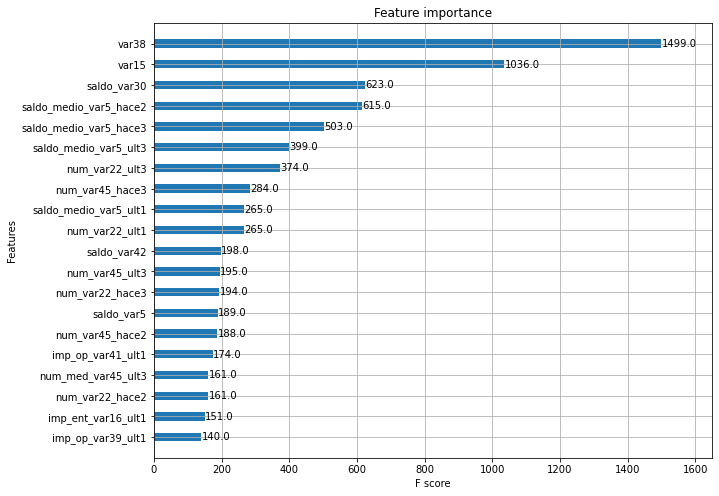

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

# LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [11]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

### 기본 모델 점수: 0.8409

## 하이퍼 파라미터 튜닝
### num_leaves, max_depth, min_child_samples, subsample
### ROC AUC: 0.8418

In [12]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	val

[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.143985	valid_1's auc: 0.830159	valid_1's binary_logloss: 0.153298
[5]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.14152	valid_1's auc: 0.831253	valid_1's binary_logloss: 0.151107
[6]	valid_0's auc: 0.84576	valid_0's binary_logloss: 0.139503	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.149167
[7]	valid_0's auc: 0.84864	valid_0's binary_logloss: 0.137792	valid_1's auc: 0.836612	valid_1's binary_logloss: 0.147629
[8]	valid_0's auc: 0.850006	valid_0's binary_logloss: 0.136329	valid_1's auc: 0.837077	va

[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.838986	valid_

[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0's binary_logloss: 0.136444	valid_1's auc: 0.837615	

[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.141663	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.15098
[6]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.139689	valid_1's auc: 0.83664	valid_1's binary_logloss: 0.14912
[7]	valid_0's auc: 0.848157	valid_0's binary_logloss: 0.137973	valid_1's auc: 0.836379	valid_1's binary_logloss: 0.147706
[8]	valid_0's auc: 0.84954	valid_0's binary_logloss: 0.136555	valid_1's auc: 0.836889	va

[47]	valid_0's auc: 0.890678	valid_0's binary_logloss: 0.118869	valid_1's auc: 0.839761	valid_1's binary_logloss: 0.1394
[48]	valid_0's auc: 0.891058	valid_0's binary_logloss: 0.118665	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139409
[49]	valid_0's auc: 0.891635	valid_0's binary_logloss: 0.118425	valid_1's auc: 0.839754	valid_1's binary_logloss: 0.139428
[50]	valid_0's auc: 0.892346	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.139501
[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc: 0.893171	valid_0's binary_logloss: 0.117764	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.139586
[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc: 0.894147	valid_0's binary_logloss: 0.117322	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.139606
[55]	valid_0's auc

[33]	valid_0's auc: 0.901073	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.833911	valid_1's binary_logloss: 0.140619
[34]	valid_0's auc: 0.902228	valid_0's binary_logloss: 0.114803	valid_1's auc: 0.834049	valid_1's binary_logloss: 0.140595
[35]	valid_0's auc: 0.902949	valid_0's binary_logloss: 0.114411	valid_1's auc: 0.833465	valid_1's binary_logloss: 0.140641
[36]	valid_0's auc: 0.90428	valid_0's binary_logloss: 0.114027	valid_1's auc: 0.833146	valid_1's binary_logloss: 0.140714
[37]	valid_0's auc: 0.90518	valid_0's binary_logloss: 0.113632	valid_1's auc: 0.833423	valid_1's binary_logloss: 0.140663
[38]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.113243	valid_1's auc: 0.83347	valid_1's binary_logloss: 0.140755
Early stopping, best iteration is:
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	valid_1's binary_logloss: 0.146192
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_loglo

[32]	valid_0's auc: 0.898643	valid_0's binary_logloss: 0.11607	valid_1's auc: 0.836864	valid_1's binary_logloss: 0.139923
[33]	valid_0's auc: 0.89992	valid_0's binary_logloss: 0.115645	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139915
[34]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.115264	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.139982
[35]	valid_0's auc: 0.901751	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.139951
[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.90

[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	

[36]	valid_0's auc: 0.90428	valid_0's binary_logloss: 0.114027	valid_1's auc: 0.833146	valid_1's binary_logloss: 0.140714
[37]	valid_0's auc: 0.90518	valid_0's binary_logloss: 0.113632	valid_1's auc: 0.833423	valid_1's binary_logloss: 0.140663
[38]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.113243	valid_1's auc: 0.83347	valid_1's binary_logloss: 0.140755
Early stopping, best iteration is:
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	valid_1's binary_logloss: 0.146192
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss

[34]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.115264	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.139982
[35]	valid_0's auc: 0.901751	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.139951
[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.906683	valid_0's binary_logloss: 0.112912	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139857
[41]	valid_0's auc: 0.907126	valid_0's binary_logloss: 0.112589	valid_1's auc: 0.836763	valid_1's binary_logloss: 0.139978
[42]	valid_0's auc: 0.

[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	va

[43]	valid_0's auc: 0.884188	valid_0's binary_logloss: 0.12095	valid_1's auc: 0.838842	valid_1's binary_logloss: 0.139242
[44]	valid_0's auc: 0.884844	valid_0's binary_logloss: 0.120718	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.139282
[45]	valid_0's auc: 0.885417	valid_0's binary_logloss: 0.120493	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.139288
[46]	valid_0's auc: 0.885803	valid_0's binary_logloss: 0.120327	valid_1's auc: 0.838716	valid_1's binary_logloss: 0.139279
[47]	valid_0's auc: 0.886486	valid_0's binary_logloss: 0.120099	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139274
[48]	valid_0's auc: 0.887253	valid_0's binary_logloss: 0.119903	valid_1's auc: 0.838451	valid_1's binary_logloss: 0.139321
[49]	valid_0's auc: 0.887742	valid_0's binary_logloss: 0.11971	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.139332
[50]	valid_0's auc: 0.888224	valid_0's binary_logloss: 0.119543	valid_1's auc: 0.838409	valid_1's binary_logloss: 0.139353
[51]	valid_0's auc

[47]	valid_0's auc: 0.888722	valid_0's binary_logloss: 0.119986	valid_1's auc: 0.844276	valid_1's binary_logloss: 0.138002
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[49]	valid_0's auc: 0.889545	valid_0's binary_logloss: 0.119601	valid_1's auc: 0.844447	valid_1's binary_logloss: 0.138002
[50]	valid_0's auc: 0.89018	valid_0's binary_logloss: 0.119358	valid_1's auc: 0.844336	valid_1's binary_logloss: 0.138021
[51]	valid_0's auc: 0.890603	valid_0's binary_logloss: 0.119182	valid_1's auc: 0.84438	valid_1's binary_logloss: 0.138019
[52]	valid_0's auc: 0.891517	valid_0's binary_logloss: 0.118924	valid_1's auc: 0.844393	valid_1's binary_logloss: 0.13803
[53]	valid_0's auc: 0.891938	valid_0's binary_logloss: 0.118749	valid_1's auc: 0.844183	valid_1's binary_logloss: 0.138086
[54]	valid_0's auc: 0.892252	valid_0's binary_logloss: 0.118601	valid_1's auc: 0.844352	valid_1's binary_logloss: 0.138077
[55]	valid_0's auc:

[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.83949	valid_0's binary_logloss: 0.147196	valid_1's auc: 0.828421	valid_1's binary_logloss: 0.156499
[4]	valid_0's auc: 0.84292	valid_0's binary_logloss: 0.14418	valid_1's auc: 0.831515	valid_1's binary_logloss: 0.153682
[5]	valid_0's auc: 0.846745	valid_0's binary_logloss: 0.141793	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.151366
[6]	valid_0's auc: 0.849204	valid_0's binary_logloss: 0.139816	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.149412
[7]	valid_0's auc: 0.850163	valid_0's binary_logloss: 0.138129	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.147877
[8]	valid_0's auc: 0.852051	valid_0's binary_logloss: 0.136672	valid_1's auc: 0.838308	va

[40]	valid_0's auc: 0.882617	valid_0's binary_logloss: 0.121559	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.13924
[41]	valid_0's auc: 0.883227	valid_0's binary_logloss: 0.121308	valid_1's auc: 0.838817	valid_1's binary_logloss: 0.13925
[42]	valid_0's auc: 0.883844	valid_0's binary_logloss: 0.121097	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.139244
[43]	valid_0's auc: 0.884188	valid_0's binary_logloss: 0.12095	valid_1's auc: 0.838842	valid_1's binary_logloss: 0.139242
[44]	valid_0's auc: 0.884844	valid_0's binary_logloss: 0.120718	valid_1's auc: 0.838637	valid_1's binary_logloss: 0.139282
[45]	valid_0's auc: 0.885417	valid_0's binary_logloss: 0.120493	valid_1's auc: 0.838678	valid_1's binary_logloss: 0.139288
[46]	valid_0's auc: 0.885803	valid_0's binary_logloss: 0.120327	valid_1's auc: 0.838716	valid_1's binary_logloss: 0.139279
[47]	valid_0's auc: 0.886486	valid_0's binary_logloss: 0.120099	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139274
[48]	valid_0's auc:

[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[49]	valid_0's auc: 0.889545	valid_0's binary_logloss: 0.119601	valid_1's auc: 0.844447	valid_1's binary_logloss: 0.138002
[50]	valid_0's auc: 0.89018	valid_0's binary_logloss: 0.119358	valid_1's auc: 0.844336	valid_1's binary_logloss: 0.138021
[51]	valid_0's auc: 0.890603	valid_0's binary_logloss: 0.119182	valid_1's auc: 0.84438	valid_1's binary_logloss: 0.138019
[52]	valid_0's auc: 0.891517	valid_0's binary_logloss: 0.118924	valid_1's auc: 0.844393	valid_1's binary_logloss: 0.13803
[53]	valid_0's auc: 0.891938	valid_0's binary_logloss: 0.118749	valid_1's auc: 0.844183	valid_1's binary_logloss: 0.138086
[54]	valid_0's auc: 0.892252	valid_0's binary_logloss: 0.118601	valid_1's auc: 0.844352	valid_1's binary_logloss: 0.138077
[55]	valid_0's auc: 0.892749	valid_0's binary_logloss: 0.118391	valid_1's auc: 0.84432	valid_1's binary_logloss: 0.138057
[56]	valid_0's auc: 

[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_logloss: 0.142785	valid_1's auc: 0.83262	valid_1's binary_logloss: 0.153215
[5]	valid_0's auc: 0.856991	valid_0's binary_logloss: 0.140075	valid_1's auc: 0.83528	valid_1's binary_logloss: 0.150936
[6]	valid_0's auc: 0.860123	valid_0's binary_logloss: 0.13786	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.149015
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[8]	valid_0's auc: 0.863556	valid_0's binary_logloss: 0.134329	valid_1's auc: 0.837522	va

[36]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.115448	valid_1's auc: 0.835902	valid_1's binary_logloss: 0.13999
[37]	valid_0's auc: 0.901964	valid_0's binary_logloss: 0.115083	valid_1's auc: 0.835674	valid_1's binary_logloss: 0.14012
[38]	valid_0's auc: 0.902511	valid_0's binary_logloss: 0.114769	valid_1's auc: 0.835307	valid_1's binary_logloss: 0.140207
Early stopping, best iteration is:
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.145898
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845013	valid_0's binary_logloss: 0.15006	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.847843	valid_0's binary_logloss: 0.145936	valid_1's auc: 0.833351	valid_1's binary_logloss: 0.155788
[4]	valid_0's auc: 0.853126	valid_0's binary_loglos

[31]	valid_0's auc: 0.896336	valid_0's binary_logloss: 0.117289	valid_1's auc: 0.838384	valid_1's binary_logloss: 0.139687
[32]	valid_0's auc: 0.897473	valid_0's binary_logloss: 0.116901	valid_1's auc: 0.838447	valid_1's binary_logloss: 0.139683
[33]	valid_0's auc: 0.898375	valid_0's binary_logloss: 0.116464	valid_1's auc: 0.838512	valid_1's binary_logloss: 0.139636
[34]	valid_0's auc: 0.899242	valid_0's binary_logloss: 0.116054	valid_1's auc: 0.838475	valid_1's binary_logloss: 0.139614
[35]	valid_0's auc: 0.900316	valid_0's binary_logloss: 0.115653	valid_1's auc: 0.838522	valid_1's binary_logloss: 0.13957
[36]	valid_0's auc: 0.901114	valid_0's binary_logloss: 0.11531	valid_1's auc: 0.838721	valid_1's binary_logloss: 0.139537
[37]	valid_0's auc: 0.901919	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.139581
[38]	valid_0's auc: 0.902827	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.839027	valid_1's binary_logloss: 0.139517
[39]	valid_0's auc

[31]	valid_0's auc: 0.894983	valid_0's binary_logloss: 0.117589	valid_1's auc: 0.831496	valid_1's binary_logloss: 0.140402
[32]	valid_0's auc: 0.896347	valid_0's binary_logloss: 0.117114	valid_1's auc: 0.831512	valid_1's binary_logloss: 0.14049
[33]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.116696	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.140462
[34]	valid_0's auc: 0.898503	valid_0's binary_logloss: 0.116337	valid_1's auc: 0.831998	valid_1's binary_logloss: 0.140436
[35]	valid_0's auc: 0.899431	valid_0's binary_logloss: 0.115966	valid_1's auc: 0.832323	valid_1's binary_logloss: 0.140357
[36]	valid_0's auc: 0.900259	valid_0's binary_logloss: 0.115619	valid_1's auc: 0.832052	valid_1's binary_logloss: 0.140411
[37]	valid_0's auc: 0.901414	valid_0's binary_logloss: 0.115269	valid_1's auc: 0.832144	valid_1's binary_logloss: 0.14042
[38]	valid_0's auc: 0.902365	valid_0's binary_logloss: 0.114862	valid_1's auc: 0.832015	valid_1's binary_logloss: 0.140464
[39]	valid_0's auc

[35]	valid_0's auc: 0.900175	valid_0's binary_logloss: 0.11578	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.139924
[36]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.115448	valid_1's auc: 0.835902	valid_1's binary_logloss: 0.13999
[37]	valid_0's auc: 0.901964	valid_0's binary_logloss: 0.115083	valid_1's auc: 0.835674	valid_1's binary_logloss: 0.14012
[38]	valid_0's auc: 0.902511	valid_0's binary_logloss: 0.114769	valid_1's auc: 0.835307	valid_1's binary_logloss: 0.140207
Early stopping, best iteration is:
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.145898
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845013	valid_0's binary_logloss: 0.15006	valid_1's auc: 0.83132	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.847843	valid_0's binary_loglos

[35]	valid_0's auc: 0.900316	valid_0's binary_logloss: 0.115653	valid_1's auc: 0.838522	valid_1's binary_logloss: 0.13957
[36]	valid_0's auc: 0.901114	valid_0's binary_logloss: 0.11531	valid_1's auc: 0.838721	valid_1's binary_logloss: 0.139537
[37]	valid_0's auc: 0.901919	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.139581
[38]	valid_0's auc: 0.902827	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.839027	valid_1's binary_logloss: 0.139517
[39]	valid_0's auc: 0.903647	valid_0's binary_logloss: 0.114176	valid_1's auc: 0.839264	valid_1's binary_logloss: 0.13948
[40]	valid_0's auc: 0.904461	valid_0's binary_logloss: 0.11382	valid_1's auc: 0.839535	valid_1's binary_logloss: 0.13945
[41]	valid_0's auc: 0.905119	valid_0's binary_logloss: 0.113454	valid_1's auc: 0.839726	valid_1's binary_logloss: 0.139429
[42]	valid_0's auc: 0.90573	valid_0's binary_logloss: 0.11309	valid_1's auc: 0.839177	valid_1's binary_logloss: 0.139527
[43]	valid_0's auc: 0.9

[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1's auc: 0.834055	valid_1's binary_logloss: 0.15137
[6]	valid_0's auc: 0.849269	valid_0's binary_logloss: 0.139637	valid_1's auc: 0.834861	valid_1's binary_logloss: 0.149513
[7]	valid_0's auc: 0.851069	valid_0's binary_logloss: 0.137899	valid_1's auc: 0.836696	valid_1's binary_logloss: 0.147828
[8]	valid_0's auc: 0.852425	valid_0's binary_logloss: 0.136444	valid_1's auc: 0.837615	

[1]	valid_0's auc: 0.823084	valid_0's binary_logloss: 0.156066	valid_1's auc: 0.821793	valid_1's binary_logloss: 0.164822
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827813	valid_0's binary_logloss: 0.150805	valid_1's auc: 0.823891	valid_1's binary_logloss: 0.159732
[3]	valid_0's auc: 0.836023	valid_0's binary_logloss: 0.147035	valid_1's auc: 0.828784	valid_1's binary_logloss: 0.156124
[4]	valid_0's auc: 0.842374	valid_0's binary_logloss: 0.143993	valid_1's auc: 0.832801	valid_1's binary_logloss: 0.153225
[5]	valid_0's auc: 0.845121	valid_0's binary_logloss: 0.141663	valid_1's auc: 0.835734	valid_1's binary_logloss: 0.15098
[6]	valid_0's auc: 0.846404	valid_0's binary_logloss: 0.139689	valid_1's auc: 0.83664	valid_1's binary_logloss: 0.14912
[7]	valid_0's auc: 0.848157	valid_0's binary_logloss: 0.137973	valid_1's auc: 0.836379	valid_1's binary_logloss: 0.147706
[8]	valid_0's auc: 0.84954	valid_0's binary_logloss: 0.136555	valid_1's auc: 0.836889	va

[47]	valid_0's auc: 0.890678	valid_0's binary_logloss: 0.118869	valid_1's auc: 0.839761	valid_1's binary_logloss: 0.1394
[48]	valid_0's auc: 0.891058	valid_0's binary_logloss: 0.118665	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139409
[49]	valid_0's auc: 0.891635	valid_0's binary_logloss: 0.118425	valid_1's auc: 0.839754	valid_1's binary_logloss: 0.139428
[50]	valid_0's auc: 0.892346	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.139501
[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc: 0.893171	valid_0's binary_logloss: 0.117764	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.139586
[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc: 0.894147	valid_0's binary_logloss: 0.117322	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.139606
[55]	valid_0's auc

[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.143985	valid_1's auc: 0.830159	valid_1's binary_logloss: 0.153298
[5]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.14152	valid_1's auc: 0.831253	valid_1's binary_logloss: 0.151107
[6]	valid_0's auc: 0.84576	valid_0's binary_logloss: 0.139503	valid_1's auc: 0.835058	valid_1's binary_logloss: 0.149167
[7]	valid_0's auc: 0.84864	valid_0's binary_logloss: 0.137792	valid_1's auc: 0.836612	valid_1's binary_logloss: 0.147629
[8]	valid_0's auc: 0.850006	valid_0's binary_logloss: 0.136329	valid_1's auc: 0.837077	va

[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.838986	valid_

[34]	valid_0's auc: 0.900819	valid_0's binary_logloss: 0.115047	valid_1's auc: 0.836189	valid_1's binary_logloss: 0.139786
[35]	valid_0's auc: 0.901929	valid_0's binary_logloss: 0.114682	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.139758
[36]	valid_0's auc: 0.902923	valid_0's binary_logloss: 0.114287	valid_1's auc: 0.836594	valid_1's binary_logloss: 0.139739
[37]	valid_0's auc: 0.903583	valid_0's binary_logloss: 0.113893	valid_1's auc: 0.836319	valid_1's binary_logloss: 0.139831
[38]	valid_0's auc: 0.904289	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139874
[39]	valid_0's auc: 0.904948	valid_0's binary_logloss: 0.113207	valid_1's auc: 0.835797	valid_1's binary_logloss: 0.139959
[40]	valid_0's auc: 0.905808	valid_0's binary_logloss: 0.112811	valid_1's auc: 0.835879	valid_1's binary_logloss: 0.139967
[41]	valid_0's auc: 0.906507	valid_0's binary_logloss: 0.112548	valid_1's auc: 0.835793	valid_1's binary_logloss: 0.139996
[42]	valid_0's a

[35]	valid_0's auc: 0.903932	valid_0's binary_logloss: 0.114157	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.139458
[36]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.113777	valid_1's auc: 0.836824	valid_1's binary_logloss: 0.139459
[37]	valid_0's auc: 0.905376	valid_0's binary_logloss: 0.113446	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.139503
[38]	valid_0's auc: 0.906535	valid_0's binary_logloss: 0.11295	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139575
[39]	valid_0's auc: 0.907125	valid_0's binary_logloss: 0.112599	valid_1's auc: 0.83631	valid_1's binary_logloss: 0.139598
[40]	valid_0's auc: 0.908267	valid_0's binary_logloss: 0.112224	valid_1's auc: 0.836096	valid_1's binary_logloss: 0.139675
[41]	valid_0's auc: 0.908916	valid_0's binary_logloss: 0.111848	valid_1's auc: 0.835954	valid_1's binary_logloss: 0.139752
Early stopping, best iteration is:
[11]	valid_0's auc: 0.871178	valid_0's binary_logloss: 0.129289	valid_1's auc: 0.839056	valid_1's binary_l

[28]	valid_0's auc: 0.896969	valid_0's binary_logloss: 0.11709	valid_1's auc: 0.840437	valid_1's binary_logloss: 0.139222
[29]	valid_0's auc: 0.898028	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.840857	valid_1's binary_logloss: 0.139136
[30]	valid_0's auc: 0.89908	valid_0's binary_logloss: 0.116142	valid_1's auc: 0.840827	valid_1's binary_logloss: 0.139074
[31]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.115699	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.138987
[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.

[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logloss: 0.14754
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	val

[32]	valid_0's auc: 0.900529	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.139496
[33]	valid_0's auc: 0.90188	valid_0's binary_logloss: 0.114972	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.139413
[34]	valid_0's auc: 0.902879	valid_0's binary_logloss: 0.114528	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.13943
[35]	valid_0's auc: 0.903932	valid_0's binary_logloss: 0.114157	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.139458
[36]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.113777	valid_1's auc: 0.836824	valid_1's binary_logloss: 0.139459
[37]	valid_0's auc: 0.905376	valid_0's binary_logloss: 0.113446	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.139503
[38]	valid_0's auc: 0.906535	valid_0's binary_logloss: 0.11295	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139575
[39]	valid_0's auc: 0.907125	valid_0's binary_logloss: 0.112599	valid_1's auc: 0.83631	valid_1's binary_logloss: 0.139598
[40]	valid_0's auc: 

[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.905129	valid_0's binary_logloss: 0.113587	valid_1's auc: 0.840769	valid_1's binary_logloss: 0.139037
[37]	valid_0's auc: 0.906133	valid_0's binary_logloss: 0.113131	valid_1's auc: 0.84035	valid_1's binary_logloss: 0.139137
[38]	valid_0's auc: 0.907	valid_0's binary_logloss: 0.112813	valid_1's auc: 0.840254	valid_1's binary_logloss: 0.139186
[39]	valid_0's auc: 0.907829	valid_0's binary_logloss: 0.112418	valid_1's auc: 0.84009	valid_1's binary_logloss: 0.139236
[40]	valid_0's auc: 0.908551	valid_0's binary_logloss: 0.112078	valid_1's auc: 0.839874	valid_1's binary_logloss: 0.139313
[41]	valid_0's auc: 0.909258	valid_0's binary_logloss: 0.111745	valid_1's auc: 0.839426	valid_1's binary_logloss: 0.139447
[42]	valid_0's auc: 0.9

[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	val

[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.15317
[5]	valid_0's auc: 0.842369	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832821	valid_1's binary_logloss: 0.150835
[6]	valid_0's auc: 0.845358	valid_0's binary_logloss: 0.13981	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.148944
[7]	valid_0's auc: 0.847188	valid_0's binary_logloss: 0.13809	valid_1's auc: 0.836752	valid_1's binary_logloss: 0.147409
[8]	valid_0's auc: 0.850075	valid_0's binary_logloss: 0.136655	valid_1's auc: 0.838523	val

[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_logloss: 0.147646
[8]	valid_0's auc: 0.850898	valid_0's binary_logloss: 0.136639	valid_1's auc: 0.838862	

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	val

[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_logloss: 0.140143	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.15094
[6]	valid_0's auc: 0.860316	valid_0's binary_logloss: 0.137951	valid_1's auc: 0.836175	valid_1's binary_logloss: 0.149162
[7]	valid_0's auc: 0.862439	valid_0's binary_logloss: 0.136077	valid_1's auc: 0.835532	valid_1's binary_logloss: 0.147649
[8]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.134388	valid_1's auc: 0.83563	

[35]	valid_0's auc: 0.900941	valid_0's binary_logloss: 0.115884	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.140703
[36]	valid_0's auc: 0.902074	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140774
[37]	valid_0's auc: 0.902849	valid_0's binary_logloss: 0.115101	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.140792
Early stopping, best iteration is:
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845934	valid_0's binary_logloss: 0.150048	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.159506
[3]	valid_0's auc: 0.849836	valid_0's binary_logloss: 0.145927	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.155735
[4]	valid_0's auc: 0.854642	valid_0's binary_log

[37]	valid_0's auc: 0.898253	valid_0's binary_logloss: 0.116123	valid_1's auc: 0.837235	valid_1's binary_logloss: 0.139781
[38]	valid_0's auc: 0.898964	valid_0's binary_logloss: 0.115828	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.139841
[39]	valid_0's auc: 0.89972	valid_0's binary_logloss: 0.115476	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.13991
[40]	valid_0's auc: 0.900293	valid_0's binary_logloss: 0.115122	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.139846
[41]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.114813	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.139923
[42]	valid_0's auc: 0.901636	valid_0's binary_logloss: 0.114489	valid_1's auc: 0.836537	valid_1's binary_logloss: 0.140017
[43]	valid_0's auc: 0.90272	valid_0's binary_logloss: 0.114161	valid_1's auc: 0.836588	valid_1's binary_logloss: 0.140025
[44]	valid_0's auc: 0.903084	valid_0's binary_logloss: 0.113909	valid_1's auc: 0.836634	valid_1's binary_logloss: 0.140037
[45]	valid_0's auc:

[61]	valid_0's auc: 0.915354	valid_0's binary_logloss: 0.107682	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.140197
[62]	valid_0's auc: 0.915606	valid_0's binary_logloss: 0.107477	valid_1's auc: 0.836606	valid_1's binary_logloss: 0.140336
[63]	valid_0's auc: 0.916315	valid_0's binary_logloss: 0.107178	valid_1's auc: 0.836449	valid_1's binary_logloss: 0.140384
[64]	valid_0's auc: 0.916522	valid_0's binary_logloss: 0.10698	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.140446
[65]	valid_0's auc: 0.917048	valid_0's binary_logloss: 0.106704	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.140528
[66]	valid_0's auc: 0.917714	valid_0's binary_logloss: 0.1065	valid_1's auc: 0.836017	valid_1's binary_logloss: 0.140589
[67]	valid_0's auc: 0.918245	valid_0's binary_logloss: 0.106235	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.140673
[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0

[36]	valid_0's auc: 0.902074	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140774
[37]	valid_0's auc: 0.902849	valid_0's binary_logloss: 0.115101	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.140792
Early stopping, best iteration is:
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845934	valid_0's binary_logloss: 0.150048	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.159506
[3]	valid_0's auc: 0.849836	valid_0's binary_logloss: 0.145927	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.155735
[4]	valid_0's auc: 0.854642	valid_0's binary_logloss: 0.142686	valid_1's auc: 0.835345	valid_1's binary_logloss: 0.152919
[5]	valid_0's auc: 0.856628	valid_0's binary_log

[35]	valid_0's auc: 0.896684	valid_0's binary_logloss: 0.116863	valid_1's auc: 0.837668	valid_1's binary_logloss: 0.139588
[36]	valid_0's auc: 0.897535	valid_0's binary_logloss: 0.116484	valid_1's auc: 0.837261	valid_1's binary_logloss: 0.139733
[37]	valid_0's auc: 0.898253	valid_0's binary_logloss: 0.116123	valid_1's auc: 0.837235	valid_1's binary_logloss: 0.139781
[38]	valid_0's auc: 0.898964	valid_0's binary_logloss: 0.115828	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.139841
[39]	valid_0's auc: 0.89972	valid_0's binary_logloss: 0.115476	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.13991
[40]	valid_0's auc: 0.900293	valid_0's binary_logloss: 0.115122	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.139846
[41]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.114813	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.139923
[42]	valid_0's auc: 0.901636	valid_0's binary_logloss: 0.114489	valid_1's auc: 0.836537	valid_1's binary_logloss: 0.140017
[43]	valid_0's auc

[61]	valid_0's auc: 0.915354	valid_0's binary_logloss: 0.107682	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.140197
[62]	valid_0's auc: 0.915606	valid_0's binary_logloss: 0.107477	valid_1's auc: 0.836606	valid_1's binary_logloss: 0.140336
[63]	valid_0's auc: 0.916315	valid_0's binary_logloss: 0.107178	valid_1's auc: 0.836449	valid_1's binary_logloss: 0.140384
[64]	valid_0's auc: 0.916522	valid_0's binary_logloss: 0.10698	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.140446
[65]	valid_0's auc: 0.917048	valid_0's binary_logloss: 0.106704	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.140528
[66]	valid_0's auc: 0.917714	valid_0's binary_logloss: 0.1065	valid_1's auc: 0.836017	valid_1's binary_logloss: 0.140589
[67]	valid_0's auc: 0.918245	valid_0's binary_logloss: 0.106235	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.140673
[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0

### 찾은 최적 파라미터에 대해 더 많은 학습 수행
### ROC AUC: 0.8417

In [13]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	v

# 불균형 분포 데이터 분류 문제

* 일반적으로 사기 검출이나 이상 검출과 같은 데이터 세트는 레이블 값이 극도로 불균형한 분포를 가지기 쉽다.

# 언더 샘플링과 오버 샘플링

* 레이블이 불균형한 분포를 가진 데이터 세트를 학습시킬 때 예측 성능의 문제가 발생할 수
있는데 이는 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해
너무 적기 때문에 발생  
  
  
* 합이상 레이블을 가지는 데이터 건수는 매우 적기 때문에 제대로 다양한 유형을 학습하지
못하는 반면에 정상 레이블을 가지는 데이터 건수는 매우 많기 때문에 일방적으로 정상 레이
블로 치우친 학습을 수행해 제대로 된 이상 데이터 검출이 어려워지기 쉬움  
  
  
* 지도학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해서는 적절한
학습 데이터를 확보하는 방안이 필요한데 대표적으로 오버 샘플링 (Oversampling)과 언더
샘플링 (Undersampling) 방법이 있으며 오버 샘플링 방식이 예측 성능 상 더 유리한 경우가
많아 주로 사용됨  


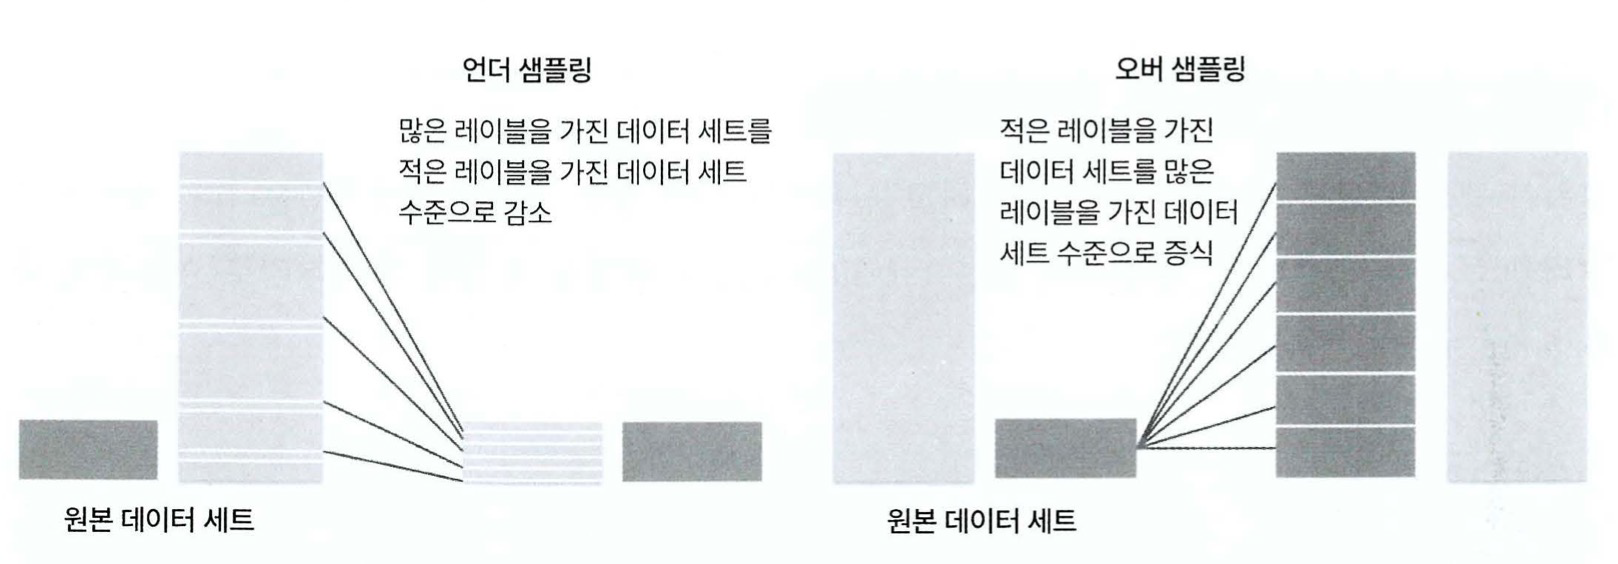

  
  
* 언더 샘플링은 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식인데 즉 정상
레이블을 가진 데이터가 10,000건 이상 레이블을 가진 데이터가 100건이 있으면 정상 레이
블 데이터를 100건으로 줄여 버리는 방식으로 이렇게 정상 레이블 데이터를 이상 레이블 데
이터 수준으로 줄여 버린 상태에서 학습을 수행하면 과도하게 정상 레이블로 학습/예측하는
부작용을 개선할 수 있지만 너무 많은 정상 레이블 데이터를 감소시키기 때문에 정상 레이블
의 경우 오히려 제대로 된 학습을 수행할 수 없다는 단점이 있어 잘 적용하지 않는 방법  

  
* 오버 샘플링은 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터
를 확보하는 방법으로 동일한 데이터를 단순히 증식하는 방법은 과적합(Overfitting)이 되기
때문에 의미가 없으므로 원본 데이터의 피처 값들을 아주 약간 변경하여 증식하는 방식인데
대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있음

  
* SMOTE는 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃(K Nearest Neighbor)을
찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가
나는 새로운 데이터들을 생성하는 방식

  
* SMOTE를 구현한 대표적인 파이씬 패키지는 imbalanced-learn  
conda install -c conda-forge imbalanced-learn  

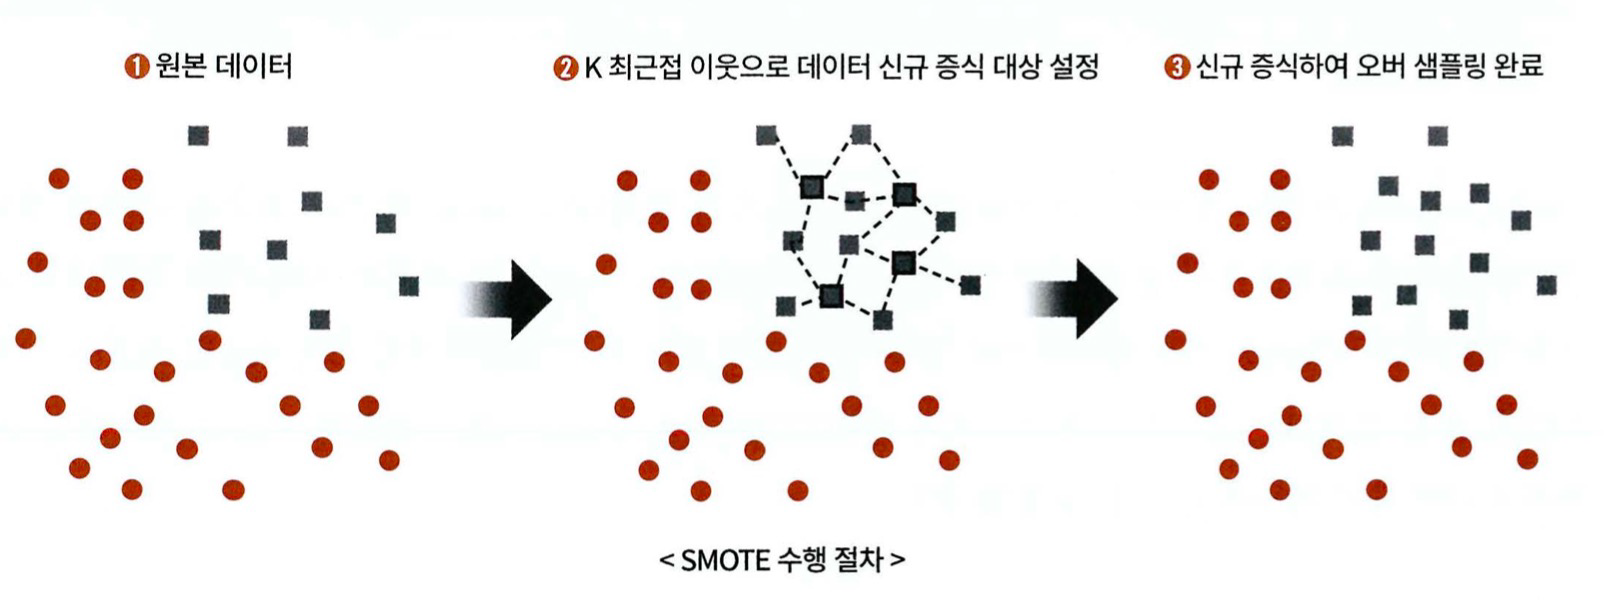


### 불균형 문제에 대한 자세한 내용은 아래 링크를 참조

https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

# 분류 실습 - 캐글 신용카드 사기 검출

* 데이터 세트의 레이블인 Class 속성은 매우 불균형한 분포를 가지고 있음
* Class는 0과 1로 분류되는데 0이 사기가 아닌 정상적인 신용카드 트랜잭션 데이터 1은 신용
카드 사기 트랜잭션을 의미
* 전체 데이터의 약 0.172%만이 레이블 값이 1 즉 사기 트랜잭션
* 일반적으로 사기 검출(Praud Detection)이나 이상 검출(Anomaly Detection)과 같은 데이터
세트는 이처럼 레이블 값이 극도로 불균형한 분포를 가지기 쉬움
* 왜냐하면 사기와 같은 이상 현상은 전체 데이터에서 차지하는 비중이 매우 적기 때문

## 데이터 확인 및 가공

In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]

In [15]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [16]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [17]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)

오차 행렬
[[85282    13]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8762, 재현율: 0.6216,    F1: 0.7273, AUC:0.8107


In [20]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)

### 불균형한 레이블 값 분포도를 가지고 있으면 LGBMClassifier 객체 생성 시 boost_from_average=False 로 파라미터를 설정해야 한다.
### 디폴트 값이 True 이니 사용시 주의 필요.

In [21]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.8783


## 중요한 피처라고 생각되는 Amount 피처의 분포를 확인 후 정규 분포화

<AxesSubplot:xlabel='Amount', ylabel='Density'>

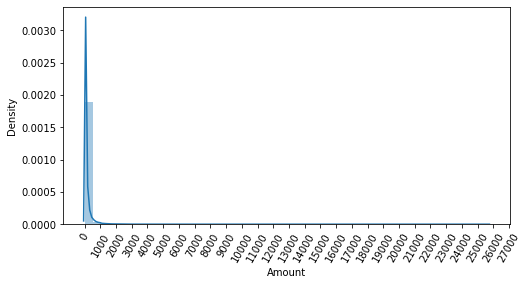

In [22]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [23]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [24]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.8040
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.8750


## 정규 분포화가 아닌 로그 변환: np.log1p()

In [25]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [26]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.8006
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.8817


## 이상치 데이터 제거

* 상관관계 히트맵에서 cmap을 ‘RdBu’로 설정해 양의 상관관계가 높을수록 색깔이 진한
파란색에 가까우며 음의 상관관계가 높을수록 색깔이 진한 빨간색에 가깝게 표현
  
  
  
* 상관관계 히트맵에서 맨 아래에 위치한 결정 레이블인 Class 피처와 음의 상관관계가
가장 높은 피처는 V14와 V17

<AxesSubplot:>

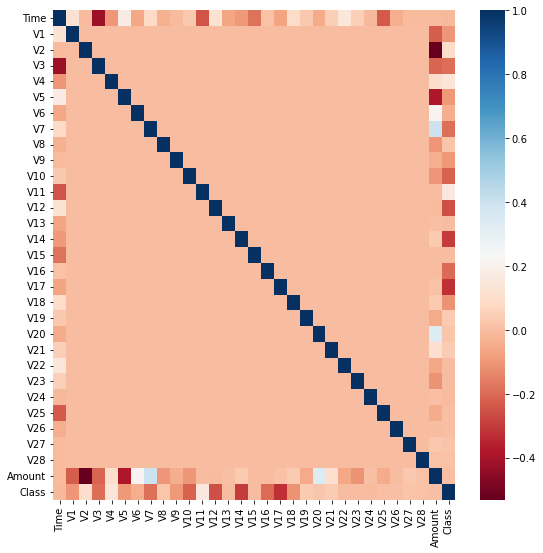

In [27]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [28]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
    

In [29]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [30]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.8355
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9144


* SMOTE는 앞에서 설치한 imbalanced-learn 패키지의 SMOTE 클래스를 이용해 간단하게 구
현이 기능


* SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링


* 검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링할 경우 결국은 원본 데이터 세트가
아닌 데이터 세트에서 검증 또는 테스트를 수행하기 때문에 올바른 검증/테스트가 될 수 없
음

## SMOTE 오버샘플링 적용 후 모델

### 교재에는 smote의 어트리뷰트로 fit_sample() 이라고 나와있는데 fit_resample() 로 바꿔주어야 한다.

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [33]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9485


In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

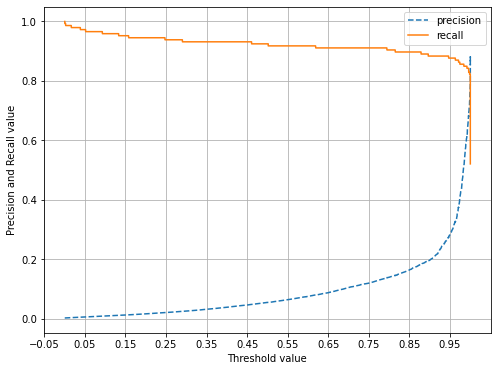

In [35]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

# 스태킹 앙상블

**위스콘신 유방암 데이터**

스태킹(Stacking)은 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅(Bagging) 및 부스팅(Boosting)과 공통점을 가지고 있다. 하지만 가장 큰 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 점이다. 즉, 개별 알고리즘의 예측 결과 dataset을 최종적인 메타 dataset으로 만들어 별도 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식이다. 개별 모델의 예측된 dataset을 기반으로 학습하고 예측하는 방식을 메타 모델이라고 한다. 스캐팅엔 개별적인 기반 모델과 최종 메타 모델이 필요하다. 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 feature dataset과 테스트 feature dataset을 만드는 것이다.

현실 모델에서 스태킹을 적용하는 경우는 많지 않지만, 캐글과 같은 대회에서 조금이라도 성능을 올려야 할 경우 자주 사용된다. 스태킹을 적용할 때는 2~3개가 아닌 많은 개별 모델이 필욯하고, 이렇게 적용한다고 해서 반드시 성능 향상이 된다는 보장은 없다. 일반적으로 성능이 비슷한 모델을 결합해 좀 더 나은 성능 향상을 도출하기 위해 적용된다.

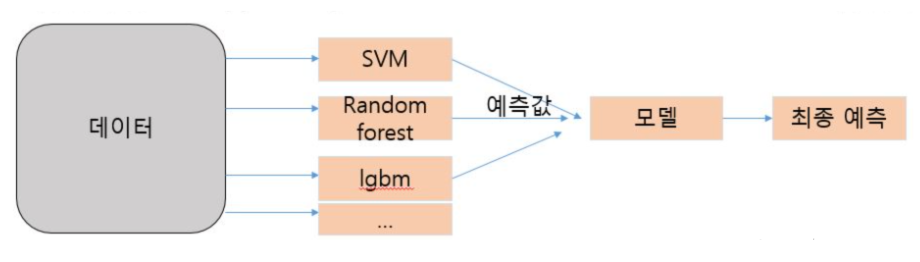

M개의 row, N개의 feature(column)을 가진 dataset이 있고 스태킹 앙상블을 위해 3개의 개별 모델이 있다고 가정한다. 먼저 각 개별 모델을 학습을 시킨 뒤 예측을 수행하면 각 M개의 row를 가진 1개의 label 값을 도출할 것이다. 이렇게 각 개별 모델에서 도출된 label들을 stacking하여 M개의 row와 3개의 column을 가진 새로운 dataset으로 만들고 최종 모델에 적용하여 예측을 수행하는 것이 스태킹 앙상블 모델이다.

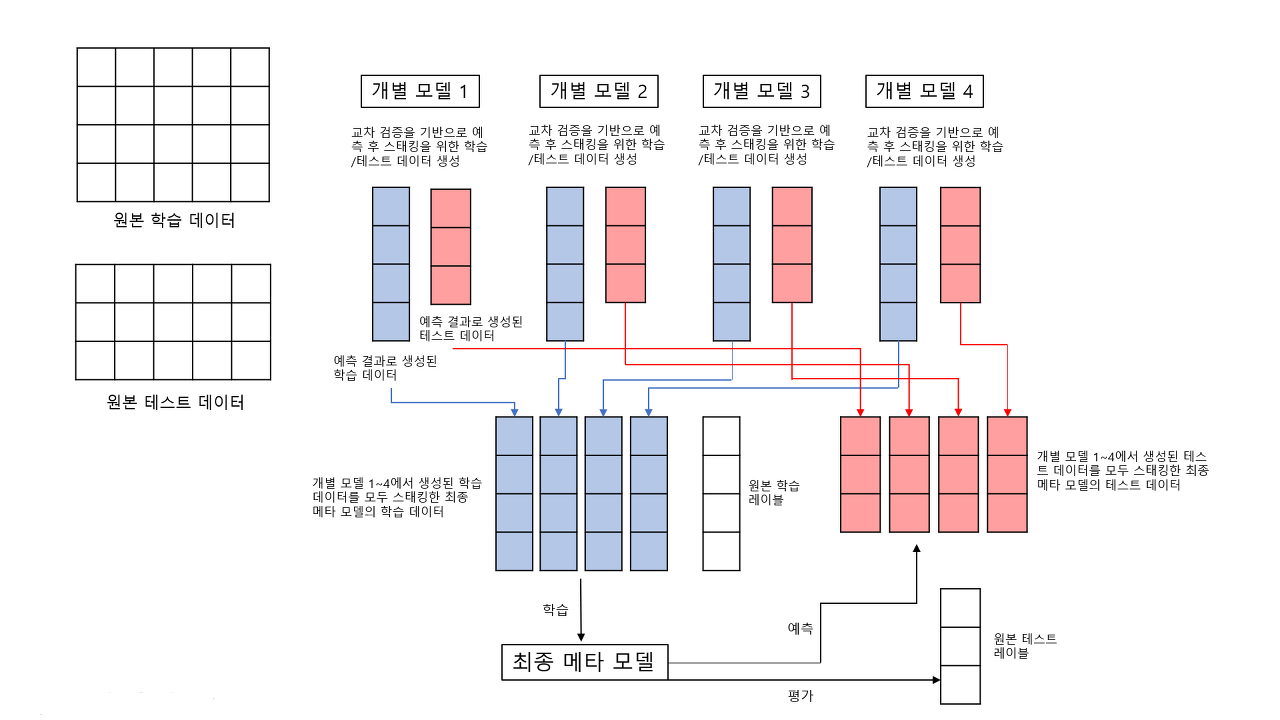

In [36]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [37]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [38]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [39]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561 :


In [40]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [41]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


# CV 셋 기반의 스태킹

CV 세트 기반의 스태킹 모델은 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용한다.

CV 세트 기반의 스태킹은 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측을 수행한다. 

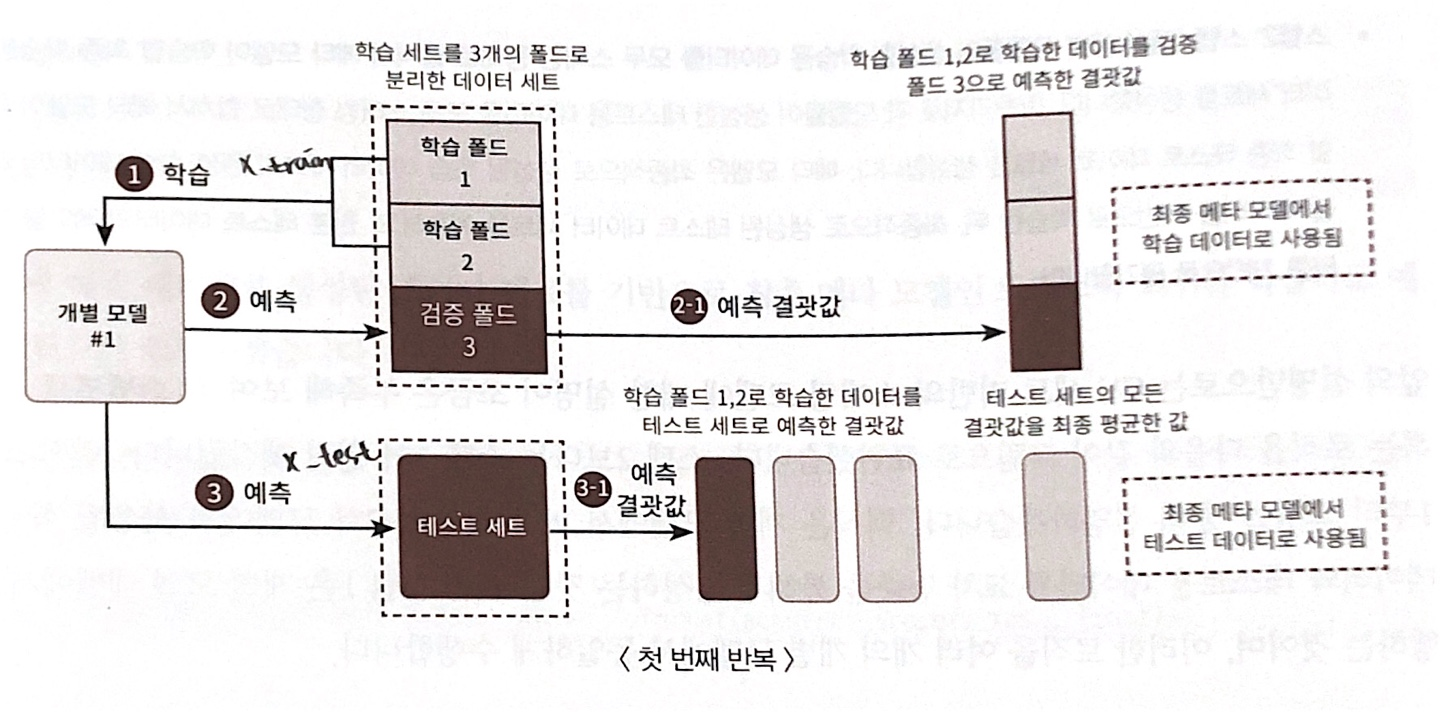

* 스텝 1: 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성한다.
 * (1) 학습용 데이터를 N개의 Fold로 나누고, N-1개의 Fold는 학습을, 나머지 1개의 Fold는 검증을 위해 사용한다.
 * (2) N-1개의 Fold로 학습된 개별 모델은 검증용 Fold로 예측을 수행하고 그 결과를 저장한다. 이러한 로직을 N번 반복하면서 검증 Fold를 변경하여 예측 결과를 저장한다. 이렇게 만들어진 예측 결과값들을 메타 모델의 학습 데이터로 사용한다.
 * (3) 그리고 N번 반복할 때마다 원본 테스트 데이터를 예측하여 이 결과값도 저장하면서 N번의 반복이 끝나면 테스트 데이터의 결과값들의 평균값을 메타 모델의 테스트 데이터로 사용한다.  
 
 



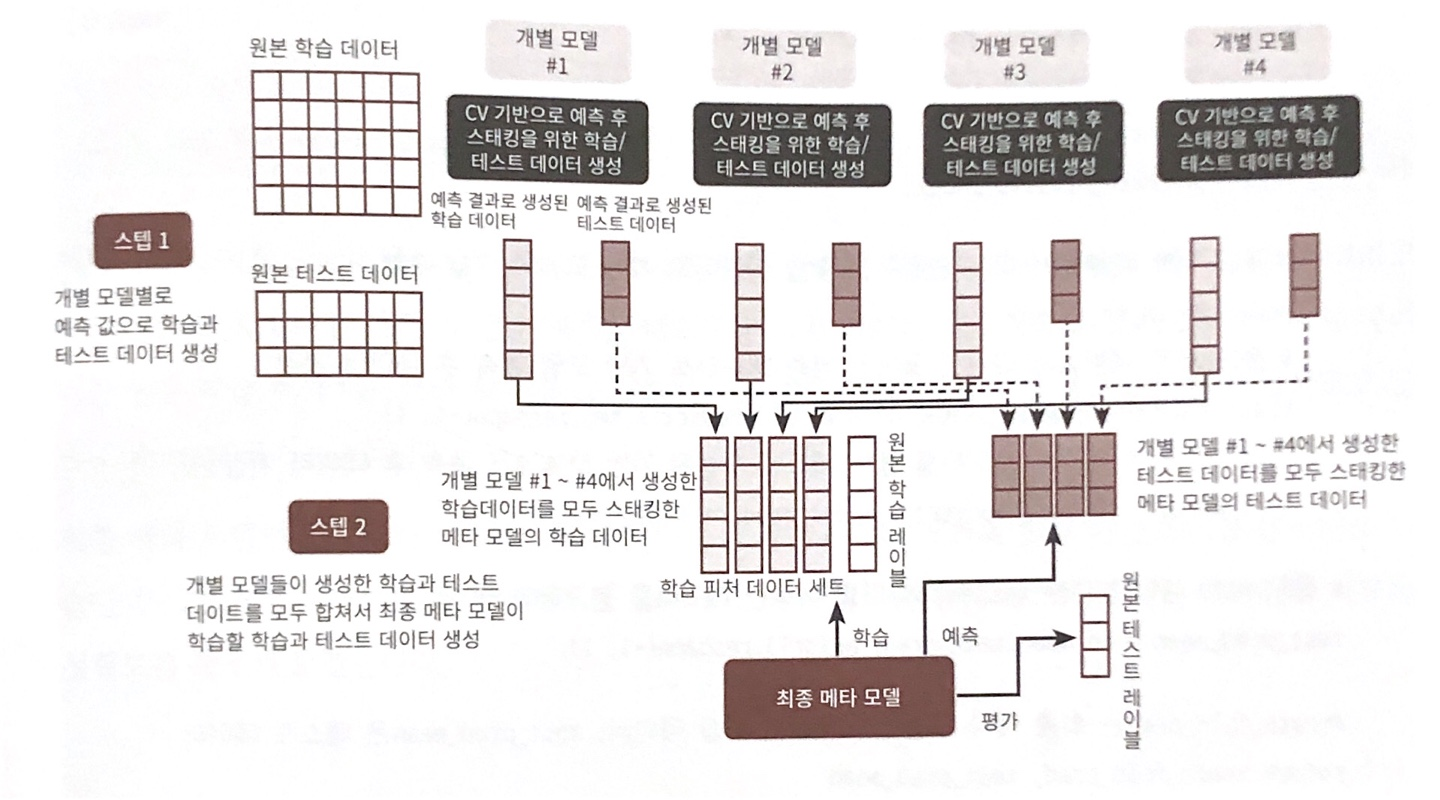


* 스텝 2: 스텝 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 dataset를 생성한다. 마찬가지로 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 예측할 최종 테스트 dataset를 생성한다. 메타 모델은 최종적으로 생성된 학습 dataset와 원본 학습 데이터의 label 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 dataset을 예측하고, 원본 테스트 데이터의 label 데이터를 기반으로 평가한다.



### 책의 코드와 달리 kf=KFold 선언 시 random_state 를 지우거나, shuffle=True를 추가해야 한다.

* get_stacking_base_datasets() 함수 생성: 개별 모델의 Classifier 객체, 원본인 학습용 피처 데이터, 원본인 학습용 레이블 데이터, 원본인 테스트 피처 데이터 그리고 K 폴드를 몇 개로 할지를 파라미터로 입력


* 함수 내에서는 폴드의 개수만큼 반복 수행 → 폴드된 학습용 데이터로 학습한 뒤 예측 결과값을 기반으로 메타 모델을 위한 학습/테스트용 데이터 새롭게 생성

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [49]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


* 앞의 기본 스태킹 모델에서 생성한 개별 모델별로 get_stacking_base_datasets() 함수를 호출해 각각 메타 모델이 추후에 사용할 학습/테스트용 데이터 세트 반환

In [50]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


* 넘파이의 concatenate()를 이용해 앞 함수로부터 반환된 각 모델별 학습/테스트 데이터를 합침
  
  

* concatenate()는 여러 개의 넘파이 배열을 칼럼 또는 로우 레벨로 합쳐주는 기능 제공
스태킹 학습 피처 데이터는 원본 학습 피처 데이터와 로우 크기는 같으며, 4개의 개별 모델 예측값을 합친 것이므로 칼럼 크기는 4

In [51]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


* 최종 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트와 원본 학습 레이블 데이터로 학습한 후에 스태킹된 테스트 데이터 세트로 예측


* 예측 결과를 원본 테스트 레이블 데이터와 비교해 정확도 측정


⇒ 최종 메타 모델의 예측 정확도는 약 97.37%로 추정. 지금까지의 예제에서는 개별 모델의 알고리즘에서 파라미터 튜닝을 최적으로 하지 않았지만, 스태킹을 이루는 모델은 최적으로 파라미터를 튜닝한 상태에서 스태킹 모델을 만드는 것이 일반적임

(스태킹은 분류뿐만 아니라 회귀에도 적용 가능)